![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)




In [4]:
![plane_image](https://www.gatwickairport.com/globalassets/flying-in/5496_14a5213_final_port_rt_lr_1-3.jpg)

***


SyntaxError: invalid syntax (1340792234.py, line 3)

# JFK Flights - Delay prediction

## Table of Contents

* [A. Introduction](#introduction)
* [B. Importing Libraries](#libraries)
* [C. Importing data](#data)


* [2. MLC2: Data understanding](#data_understanding)
    * [2.1. MLC2.1.: Univariate data analysis](#univariate_data_analysis)
        * [2.1.1. Dataset size](#dataset_size)
        * [2.1.2. Direct visualization of the data](#direct_visualization)
        * [2.1.3. Variable types](#variable_types)
        * [2.1.4. Descriptive statistics](#descriptive_statistics)
        * [2.1.5. Null values](#null_values)
        * [2.1.6. Distribution of target](#target_distribution)
        * [2.1.7-2.1.10. Variables distribution & relations with target](#variables_distribution)
    * [2.2. MLC2.2.: Multivariate data analysis](#multivariate_data_analysis)

  
        
* [3. MLC3: Data preparation](#data_preparation)
    * [3.1. MLC 3.1. Data cleaning](#data_cleaning)
        * [3.1.1. Dealing with variable types](#dealing_variable_types)
        * [3.1.2. Imputation of null values](#nulls_imputation)
        * [3.1.4. Elimination of features with low variance](#low_variance)
    * [3.2. MLC 3.2. Data transformation](#data_transformation)
        * [3.2.1. Transformation of categorical variables](#transformation_categorical)
    * [3.3. MLC 3.3. Feature engineering](#feature_engineering)



* [4. MLC4: Modelling](#modelling)
    * [4.1. MLC 4.1. Data partition and sampling](#dataset_partition)
        * [Random hold hout](#random_holdout)
        * [K-fold cross-validation](#k_fold)
    * [4.2. MLC 4.2. Model definition](#model_definition)
    * [4.3. MLC 4.3. Model optimization](#model_optimization)
        * [4.3.1. Hyperparameter optimization](#hyperparameter_optimization)
        * [4.3.2. Ensemble models](#ensemble_models)


* [5. MLC5: Evaluation](#model_evaluation)





## A. Introduction <a class="anchor" id="introduction"></a>


The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. 

You have been recently hired as a Data Scientist by the DOT to help them mitigate the consequences of delayed flights. Our assignment is the development of a machine learning model that allows to predict the probability of a flight been delayed. 

As a first exercise, we are implementing a **model to predict whether a flight will have a delay higher than 15 minutes.** The data available contains all relevant information for flights arriving to JFK airport (NYC). This is the data that we will use to build a first pilot version of the model. If this model is proven effective, our model will be extended to incorporate all airports at a national level.  

## (Extra) Jupyter notebook shortcuts

In any mode:
* Shift + Enter run the current cell, select below
* Ctrl + Enter run selected cells
* Ctrl + S save and checkpoint

While in command mode (press Esc to activate):
* Enter take you into edit mode
* Up select cell above
* Down select cell below
* A insert cell above
* B insert cell below
* D, D (press the key twice) delete selected cells
* Z undo cell deletion
* S Save and Checkpoint
* Y change the cell type to Code
* M change the cell type to Markdown
* H show all shortcuts


## B. Importing libraries<a class="anchor" id="libraries"></a>

Let's import the 4 main libraries used for ML in Python: 

1. **Numpy**: vectors and matrices (numpy Arrays). Pandas is built on numpy 
2. **Pandas**: library for Series and DataFrames (and data analysis functions)
3. **Matplotlib**: library for visualization (pandas visualization functions are supported by matplotlib)
4. **Seaborn**: another library for plotting and visualization (fancier plots)

We are also setting up a couple of visualization settings:

     - %matplotlib inline sets the backend of matplotlib to the 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
     
     - matplotlib styele_use: allows to choose between different available plotting styles  (https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
     
     - pd.set_option('display.max_rows', 500): sets up the maximum number for rows that we can visualize after for example print or head commands
     
     - pd.options.display.float_format allows to specify the numeric format in which you want all your floats to be displayed (e.g. number of decimal digits). 



In [1]:
import numpy as np # linear algebra
import pandas as pd # Series and DataFrames

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

We are also loading all preprocessing functions from scikit-learn (available in **scikit preprocessing**).

In [2]:
from sklearn import preprocessing

And it's always useful to be aware of the scikit-learn version that we are working with

In [3]:
from sklearn import __version__ as sklearn_version
print('Installed version for scikit-learn: {}.'.format(sklearn_version))

Installed version for scikit-learn: 0.21.3.


In [4]:
#!pip install jupyter_contrib_nbextensions
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable spellchecker/main

*** 

## C. Importing data<a class="anchor" id="data"></a>

Before starting with our ML Checklist, the first stage is to import the data for this project (JFKFlights). This dataset is available in the official website for the US Bureau of Transportation Statistics, but we'll directly download it from a public repository in GitHub. The dataset is split in two files because of size limitations from Github. We'll have to import them independently and merge them. 

In [5]:
url1 = 'https://bit.ly/3jAxEwk'

In [6]:
url2 = 'https://bit.ly/3t8qJOf'

**Useful command: '?':** after importing a module, you can view help on the imported module by typing the module name followed by a question mark '?' or '??'

In [7]:
pd.read_csv?

Let's import the first part of the dataset

In [8]:
df1 = pd.read_csv(url1)

In [9]:
df1.head()

,Unnamed: 0,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,0,2018-02-01,"20,363.00",N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,27.00,1719,0.00,140.00,765.00
1,1,2018-02-01,"20,363.00",N920XJ,RDU,"Raleigh/Durham, NC",North Carolina,JFK,"New York, NY",New York,1354,37.00,1541,0.00,107.00,427.00
2,2,2018-02-01,"20,363.00",N605LR,BUF,"Buffalo, NY",New York,JFK,"New York, NY",New York,1529,21.00,1709,0.00,100.00,301.00
3,3,2018-02-01,"20,363.00",N800AY,ORF,"Norfolk, VA",Virginia,JFK,"New York, NY",New York,1704,36.00,1845,0.00,101.00,290.00
4,4,2018-02-01,"20,363.00",N600LR,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,1325,20.00,1454,0.00,89.00,187.00


**Useful command: '%%time':** %%time is a magic command, which is part of IPython. %%time prints the wall time for the entire cell (%time gives you the time for first line only). Using %%time or %time prints 2 values:

    - CPU Times
    - Wall Time

Let's import the second part of the dataset (testing out the %%line command)

In [10]:
%%time
df2 = pd.read_csv(url2, index_col = 0)

CPU times: user 309 ms, sys: 85.2 ms, total: 394 ms
Wall time: 2.48 s


In [11]:
df2.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
100000,2019-08-23,"20,363.00",N605LR,IND,"Indianapolis, IN",Indiana,JFK,"New York, NY",New York,1922,13.00,2145,0.00,143.00,665.00
100001,2019-08-23,"20,363.00",N604LR,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1031,nan,1415,0.00,164.00,765.00
100002,2019-08-23,"20,363.00",N601LR,PIT,"Pittsburgh, PA",Pennsylvania,JFK,"New York, NY",New York,1718,18.00,1854,0.00,96.00,340.00
100003,2019-08-23,"19,805.00",N857NN,PHX,"Phoenix, AZ",Arizona,JFK,"New York, NY",New York,1218,22.00,2029,0.00,311.00,"2,153.00"
100004,2019-08-23,"20,398.00",N852AE,PIT,"Pittsburgh, PA",Pennsylvania,JFK,"New York, NY",New York,1401,11.00,1544,0.00,103.00,340.00


We can now merge both parts of the dataset using the append command from pandas

In [12]:
df = df1.append(df2)

/home/local/FARFETCH/tiago.otto/.virtualenvs/python3/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [13]:
df.head()

,ARR_DEL15,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,DEST,DEST_CITY_NAME,DEST_STATE_NM,DISTANCE,FL_DATE,OP_CARRIER_AIRLINE_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,TAIL_NUM,TAXI_OUT,Unnamed: 0
0,0.00,1719,1359,140.00,JFK,"New York, NY",New York,765.00,2018-02-01,"20,363.00",BNA,"Nashville, TN",Tennessee,N299PQ,27.00,0.00
1,0.00,1541,1354,107.00,JFK,"New York, NY",New York,427.00,2018-02-01,"20,363.00",RDU,"Raleigh/Durham, NC",North Carolina,N920XJ,37.00,1.00
2,0.00,1709,1529,100.00,JFK,"New York, NY",New York,301.00,2018-02-01,"20,363.00",BUF,"Buffalo, NY",New York,N605LR,21.00,2.00
3,0.00,1845,1704,101.00,JFK,"New York, NY",New York,290.00,2018-02-01,"20,363.00",ORF,"Norfolk, VA",Virginia,N800AY,36.00,3.00
4,0.00,1454,1325,89.00,JFK,"New York, NY",New York,187.00,2018-02-01,"20,363.00",BOS,"Boston, MA",Massachusetts,N600LR,20.00,4.00


In [14]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ARR_DEL15,"250,152.00",0.21,0.41,0.00,0.00,0.00,0.00,1.00
CRS_ARR_TIME,"250,152.00","1,419.13",580.99,1.00,944.00,"1,455.00","1,914.00","2,400.00"
CRS_DEP_TIME,"250,152.00","1,334.61",529.10,3.00,915.00,"1,258.00","1,744.00","2,359.00"
CRS_ELAPSED_TIME,"250,152.00",195.65,97.37,47.00,109.00,167.00,306.00,595.00
DISTANCE,"250,152.00","1,258.84",898.12,94.00,427.00,"1,028.00","2,248.00","4,983.00"
OP_CARRIER_AIRLINE_ID,"237,644.00","20,152.00",297.88,"19,690.00","19,790.00","20,363.00","20,409.00","21,171.00"
TAXI_OUT,"232,641.00",18.19,9.61,1.00,12.00,16.00,21.00,166.00


In [16]:
df.reset_index(drop = True, inplace = True)

Our dataset is ready, we can now start with our ML checklist. We're going to assume that a deep business understanding has already taken place before. Step 2: Data Understanding

## MLC2: Data Understanding<a class="anchor" id="data_understanding"></a>

## MLC2.1: Univariate data analysis<a class="anchor" id="univariate_data_analysis"></a>


### 2.1.1. Dataset size<a class="anchor" id="dataset_size"></a>


Because we've imported our dataset as a DataFrame, we can now use all functions available for pandas DataFrames, including descriptive statistics methods and visualization functions amongst others. All methods available (and parameters required) within the pandas library are available in  https://pandas.py:data.org/pandas-docs/stable/reference/api/pandas.DataFrame.html.

**df.info()** allows to explore the basic information of the dataset

In [17]:
df.info?

In [18]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Columns: 15 entries, ARR_DEL15 to TAXI_OUT
dtypes: float64(5), int64(2), object(8)
memory usage: 28.6+ MB


### 2.1.2.  Direct visualization of the data<a class="anchor" id="direct_visualization"></a>

**df.columns** prints the list of columns in the dataset. 

In [19]:
df.columns

Index(['ARR_DEL15', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_NM', 'DISTANCE', 'FL_DATE',
       'OP_CARRIER_AIRLINE_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_NM', 'TAIL_NUM', 'TAXI_OUT'],
      dtype='object')

We can directly visualize the first rows of the DataFrame using **head**. We can visualize the last rows using **tail**. Sometimes transposing the matrix can help to visualized their output. 


In [20]:
df.head(1)

,ARR_DEL15,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,DEST,DEST_CITY_NAME,DEST_STATE_NM,DISTANCE,FL_DATE,OP_CARRIER_AIRLINE_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,TAIL_NUM,TAXI_OUT
0,0.00,1719,1359,140.00,JFK,"New York, NY",New York,765.00,2018-02-01,"20,363.00",BNA,"Nashville, TN",Tennessee,N299PQ,27.00


In [21]:
df.head(4).T

,0,1,2,3
ARR_DEL15,0.00,0.00,0.00,0.00
CRS_ARR_TIME,1719,1541,1709,1845
CRS_DEP_TIME,1359,1354,1529,1704
CRS_ELAPSED_TIME,140.00,107.00,100.00,101.00
DEST,JFK,JFK,JFK,JFK
DEST_CITY_NAME,"New York, NY","New York, NY","New York, NY","New York, NY"
DEST_STATE_NM,New York,New York,New York,New York
DISTANCE,765.00,427.00,301.00,290.00
FL_DATE,2018-02-01,2018-02-01,2018-02-01,2018-02-01
OP_CARRIER_AIRLINE_ID,"20,363.00","20,363.00","20,363.00","20,363.00"


A key initial point to start our data understanding stage is to comprehend the structure of the dataset. What does each row of data represent? For this case, each row corresponds to a particular flight (with specified date and time). That means that there is one row for each (**FL_DATE-CRS_DEP_TIME-TAIL_NUM**) combination. There should not be duplicated registers for a particular combinations. This is something that we will always want to verify: 

In [22]:
print("Total number of rows in the dataframe: ",df.shape[0])
print("Number of unique FL_DATE-CRS_DEP_TIME-TAIL_NUM combinations: ", df[['FL_DATE','CRS_DEP_TIME','TAIL_NUM']].drop_duplicates().shape[0])

Total number of rows in the dataframe:  250152
Number of unique FL_DATE-CRS_DEP_TIME-TAIL_NUM combinations:  249708


In [23]:
df.columns

Index(['ARR_DEL15', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_NM', 'DISTANCE', 'FL_DATE',
       'OP_CARRIER_AIRLINE_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_NM', 'TAIL_NUM', 'TAXI_OUT'],
      dtype='object')

This is a surprise! This is something we will have to look into later... 

But before, here is the available information explaining each variable in the dataset:

* **FL_DATE**: Date of the observation
* **OP_CARRIER_AIRLINE_ID**: IAn identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.
* **TAIL_NUM**: Tail Number, unique identifier for the plane
* **ORIGIN**: origin airport
* **ORIGIN_CITY_NAME**: origin airport
* **ORIGIN_STATE_NM**: origin state (USA)
* **DEST**: destination airport (JFK for all registers)
* **DEST_CITY_NAME**: destination city (NYC for all registers)
* **DEST_STATE_NM**: destination state (NY for all registers)
* **CRS_DEP_TIME**: scheduled departure time
* **TAXI_OUT**: run away time (time between exit from terminal and take-off) 
* **CRS_ARR_TIME**: scheduled arrival time
* **ARR_DEL15**: boolean (1/0) indicating if there has been more than 15 minutes delay
* **CRS_ELAPSED_TIME**: expected flight duration
* **DISTANCE**: distance between airports

We are working on a classification problem, and our target will be the variable **ARR_DEL15**. 



In [24]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Columns: 15 entries, ARR_DEL15 to TAXI_OUT
dtypes: float64(5), int64(2), object(8)
memory usage: 28.6+ MB


### 2.1.3. Types of variables available<a class="anchor" id="variable_types"></a>

The variable types inferred by default might not always be the adequate ones. If we have not indicated pandas each variable's format when reading the input file (which is not always feasible), one of the first steps must be the analaysis of the variable types. We can do that using either the **info()** function (specifying the parameter *verbose = True*) or using **dtypes**

In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Data columns (total 15 columns):
ARR_DEL15                250152 non-null float64
CRS_ARR_TIME             250152 non-null int64
CRS_DEP_TIME             250152 non-null int64
CRS_ELAPSED_TIME         250152 non-null float64
DEST                     250152 non-null object
DEST_CITY_NAME           250152 non-null object
DEST_STATE_NM            250152 non-null object
DISTANCE                 250152 non-null float64
FL_DATE                  250152 non-null object
OP_CARRIER_AIRLINE_ID    237644 non-null float64
ORIGIN                   250152 non-null object
ORIGIN_CITY_NAME         250152 non-null object
ORIGIN_STATE_NM          250152 non-null object
TAIL_NUM                 235143 non-null object
TAXI_OUT                 232641 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 28.6+ MB


In [26]:
df.dtypes

ARR_DEL15                float64
CRS_ARR_TIME               int64
CRS_DEP_TIME               int64
CRS_ELAPSED_TIME         float64
DEST                      object
DEST_CITY_NAME            object
DEST_STATE_NM             object
DISTANCE                 float64
FL_DATE                   object
OP_CARRIER_AIRLINE_ID    float64
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_NM           object
TAIL_NUM                  object
TAXI_OUT                 float64
dtype: object

### 2.1.4. Descriptive statistics<a class="anchor" id="descriptive_statistics"></a>

By descriptive statistics we refer to the analsysis of each variable's distriubtion (mean, percentiles, standard deviation, etc.). A very easy way to do so is using the **describe** function

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ARR_DEL15,"250,152.00",0.21,0.41,0.00,0.00,0.00,0.00,1.00
CRS_ARR_TIME,"250,152.00","1,419.13",580.99,1.00,944.00,"1,455.00","1,914.00","2,400.00"
CRS_DEP_TIME,"250,152.00","1,334.61",529.10,3.00,915.00,"1,258.00","1,744.00","2,359.00"
CRS_ELAPSED_TIME,"250,152.00",195.65,97.37,47.00,109.00,167.00,306.00,595.00
DISTANCE,"250,152.00","1,258.84",898.12,94.00,427.00,"1,028.00","2,248.00","4,983.00"
OP_CARRIER_AIRLINE_ID,"237,644.00","20,152.00",297.88,"19,690.00","19,790.00","20,363.00","20,409.00","21,171.00"
TAXI_OUT,"232,641.00",18.19,9.61,1.00,12.00,16.00,21.00,166.00


If there are both numerical and categorical variables in the dataset, the **describe** function only includes the numerical variables by default. The *include* parameter allows to specify the variable type that we want to analyze. 

In [28]:
df.describe(include=['object']).T
## Alternative
# df.describe(exclude = np.number).T

,count,unique,top,freq
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152
FL_DATE,250152,730,2018-07-19,394
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
TAIL_NUM,235143,2645,N110AN,761


Another option would have been the previous selection of the categorical columns in the DataFrame using the function **select_dtypes()**. That selection would be then proceeded by the application of the **describe** function. 


In [29]:
df.select_dtypes(include=['object']).describe().T


,count,unique,top,freq
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152
FL_DATE,250152,730,2018-07-19,394
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
TAIL_NUM,235143,2645,N110AN,761


### 2.1.5. Number/fractions of null values<a class="anchor" id="null_values"></a>

The **describe** function allows to see which variables do contain null values in their distribution (total-count>0). A more straightforward alternative is the method **isnull()**, which returns a matrix indicating whether each element of the DatraFrame is a null value. Counting nulls per column is a matter of summing over across columns. 

Let's do it independently for numeric and categorical columns.  

In [30]:
df.select_dtypes(include=['number']).isnull().sum()

ARR_DEL15                    0
CRS_ARR_TIME                 0
CRS_DEP_TIME                 0
CRS_ELAPSED_TIME             0
DISTANCE                     0
OP_CARRIER_AIRLINE_ID    12508
TAXI_OUT                 17511
dtype: int64

In [31]:
df.select_dtypes(include=['object']).isnull().sum()

DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
FL_DATE                 0
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
TAIL_NUM            15009
dtype: int64

### 2.1.6. Distribution / range of target values<a class="anchor" id="target_distribution"></a>

The evaluation of the target distribution is a fundamental step in supervised learning problems. What's the fraction of 1s in my dataset? For categorical variables, how's the target distributed across variables? Are all flights from a a particular origin delayed? Are delays equally distributed across origins? A very useful method is the **value_counts()** function for Series. 

In [32]:
df['ARR_DEL15'].value_counts()

0.00    197520
1.00     52632
Name: ARR_DEL15, dtype: int64

**Reminder:** The use of simple '[ ]' or double '[[ ]]' will determine whether we are working with a Series or another DataFrame. 

In [33]:
print('This is a DataFrame')
print(type(df[['ARR_DEL15']]))
df[['ARR_DEL15']].head()

This is a DataFrame
<class 'pandas.core.frame.DataFrame'>


,ARR_DEL15
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00


In [34]:
print('This is a Series')
print(type(df['ARR_DEL15']))
df['ARR_DEL15'].head()

This is a Series
<class 'pandas.core.series.Series'>


0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
Name: ARR_DEL15, dtype: float64

Variable types and object types are important. The methods and functions available vary between different object types. The function **value_counts()** is only available for Series. 


Al llamar a value_counts, es importante usar el parámetro **dropna = False** para ver si hay valores nulos (en caso de que no lo hayamos hecho antes).

In [35]:
df['ARR_DEL15'].value_counts()

0.00    197520
1.00     52632
Name: ARR_DEL15, dtype: int64

We can also use seaborn's count plot to quickly visualize the target distribution 

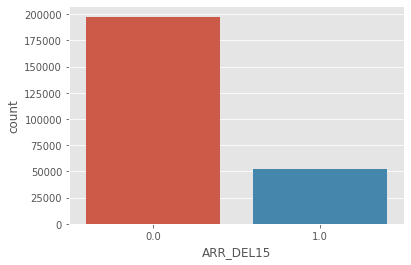

In [36]:
sns.countplot(data=df, x='ARR_DEL15')

Our target variables contains two values 
- ARR_DEL15 = 1
- ARR_DEL15 = 0 

If the target variable hadn't been already in a 0/1 format, it's always a good practice to transform it into it. We'll frequently carry out operations such as aggregations for which the 0/1 format is needed.  

How would we do that? We could have used the evaluation operator. In Python, any expression included between parentheses **()** will be evaluated. If the expression is correct, it will return a boolean True; otherwise it will return a boolean False. Let's see one example. Let's evaluate whether the target is equal to 1

In [37]:
(df['ARR_DEL15'] == 1)
### Alternatively
# df['ARR_DEL15'] == 1 

0         False
1         False
2         False
3         False
4         False
          ...  
250147    False
250148    False
250149    False
250150    False
250151    False
Name: ARR_DEL15, Length: 250152, dtype: bool

Now that we've made sure that our target variable is in 0/1 format, there are many alternatives to analyze its distribution.

**count()** over the Series returns the number of rows in the DataFrame

In [38]:
df['ARR_DEL15'].count()

250152

**sum** returns the sum over the column (target). As the target variable is in a 0/1 format, the sum corresponds to the number of positive rows in the dataset (number of flights with more than 15 minutes delay)

In [39]:
df['ARR_DEL15'].sum()

52632.0

**mean** returns the number of 1s over the total, i.e. the fraction of positives in the dataset

In [40]:
df['ARR_DEL15'].mean()

0.21040007675333397

### 2.1.7 - 2.1.9. Variables distribution and relations with target<a class="anchor" id="variables_distribution"></a>

Let's start looking at a few variables. This will be also useful to review a few of the methods from pandas, matplotlib and seaborn. 


#### Date variables

Let's start taking a look at the number of delayed flights across time. We can group by 'FL_DATE' and sum the 'ARR_DEL15' variable (expressed in days). An important point to always keep in mind is that the groupby method changes the index of our DataFrame (setting the grouping variable as new index). For plotting purposes with pandas, it's very useful to have our date variable as index (another way to set our date variable as index would be using the function **df.set_index('FL_DATE',inplace=True)**). 

In [41]:
df_daily = df[['FL_DATE','ARR_DEL15']].groupby(['FL_DATE']).mean()

In [42]:
df_daily.head()

,ARR_DEL15
FL_DATE,
2018-01-01,0.32
2018-01-02,0.32
2018-01-03,0.21
2018-01-04,0.83
2018-01-05,0.88


In [43]:
pd.DataFrame.plot?

In [44]:
df_daily.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 2018-01-01 to 2019-12-31
Columns: 1 entries, ARR_DEL15 to ARR_DEL15
dtypes: float64(1)
memory usage: 11.4+ KB


Our index is not a date variable. We need to transform it to date format in order for pandas tu interpret it as such (very useful for summaries and plots)

In [45]:
df_daily.index = pd.to_datetime(df_daily.index, format = '%Y-%m-%d')
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format = '%Y-%m-%d')


We are finally ready to plot distribution of delayed flights across time! 

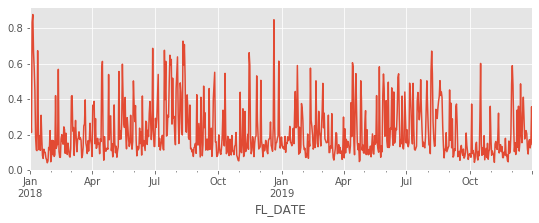

In [46]:
plt.figure(figsize=[9,3])
df_daily['ARR_DEL15'].plot()

The daily plot might not be as clean as we expected. Let's try to plot the weekly mean for the same variable. A weekely mean might allow us to appreciate a certain seasonality of the series. 

In [47]:
df_weekly_mean = df_daily['ARR_DEL15'].resample('W').mean()

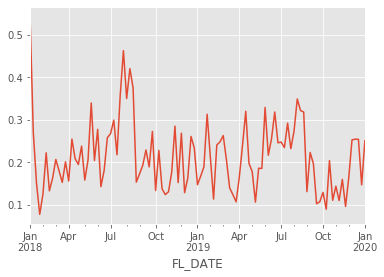

In [48]:
df_weekly_mean.plot()

And let's do the same for a monthly frequency

In [49]:
df_monthly_mean = df_daily['ARR_DEL15'].resample('M').mean()

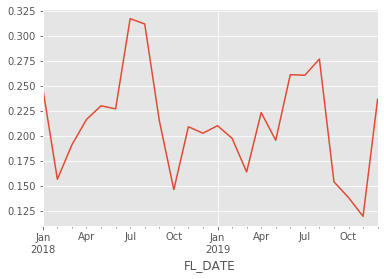

In [50]:
df_monthly_mean.plot()

It seems that the majority of the delays are concentrated during the summer

#### Variable TAXI-OUT  (run away time)

Let's use a histogram to evaluate the distribution of the variable. 


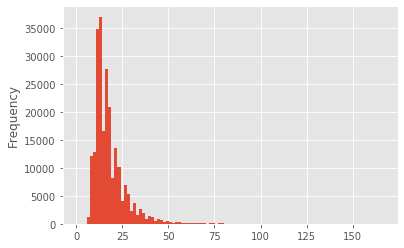

In [51]:
df['TAXI_OUT'].plot(kind='hist', bins = 100)

A boxplot is an illustrative way to evaluate whether the variable distribution varies for different classes

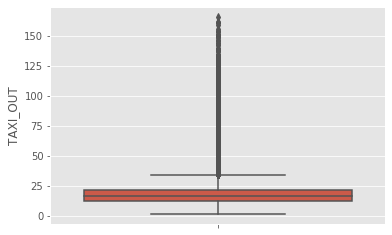

In [52]:
## Without target
sns.boxplot(data=df, y='TAXI_OUT')

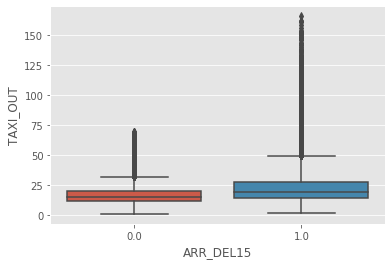

In [53]:
## with target
sns.boxplot(data=df, x='ARR_DEL15', y='TAXI_OUT')

But we could have also checked the numbers directly 

In [54]:
df[['TAXI_OUT','ARR_DEL15']].groupby('ARR_DEL15').describe()

TAXI_OUT                                          
               count  mean   std  min   25%   50%   75%    max
ARR_DEL15                                                     
0.00      183,813.00 16.80  6.79 1.00 12.00 15.00 20.00  69.00
1.00       48,828.00 23.43 15.21 2.00 14.00 19.00 28.00 166.00

## MLC2.2: Multivariate data analysis<a class="anchor" id="multivariate_data_analysis"></a>


#### Variables CRS_DEP_TIME & CRS_ARR_TIME 

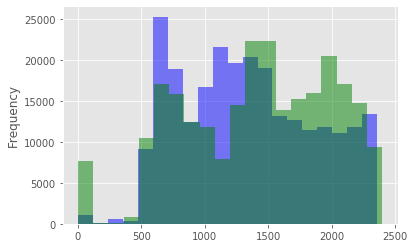

In [55]:
df['CRS_DEP_TIME'].plot(kind='hist', alpha=.5, bins = 20, color="blue")
df['CRS_ARR_TIME'].plot(kind='hist', alpha=.5, bins = 20, color="green")

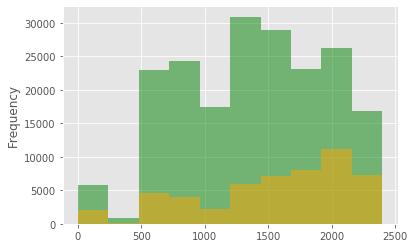

In [56]:
df[df.ARR_DEL15 == 0]['CRS_ARR_TIME'].plot(kind='hist', alpha=.5, color="green")
df[df.ARR_DEL15 == 1]['CRS_ARR_TIME'].plot(kind='hist', alpha=.5, color="orange")

There seems to be a higher number of delayed flights at the end of the day. But do not jump into any preliminary conclusions yet. It will be important to evaluate whether there are also more flights at this time of the day. 

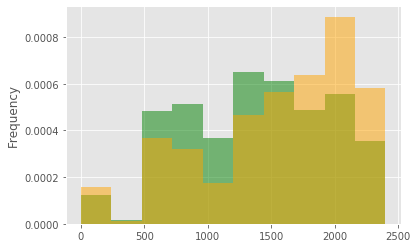

In [57]:
df[df.ARR_DEL15 == 0]['CRS_ARR_TIME'].plot(kind='hist', alpha=.5, color="green", density=True)
df[df.ARR_DEL15 == 1]['CRS_ARR_TIME'].plot(kind='hist', alpha=.5, color="orange", density=True)

#### Variable  DISTANCE

We can use the boxplot visualization function available for pandas to take a look at the distribution of distances in the data

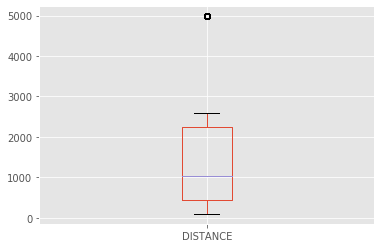

In [58]:
df['DISTANCE'].plot(kind='box')


But alternatively  we could use the boxplot function in seaborn as well. Seaborn allows to quickly visualize different variables together. 

In [59]:
sns.boxplot?

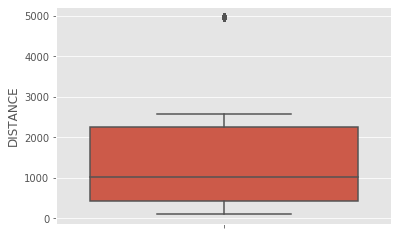

In [60]:
sns.boxplot(data=df, y='DISTANCE')

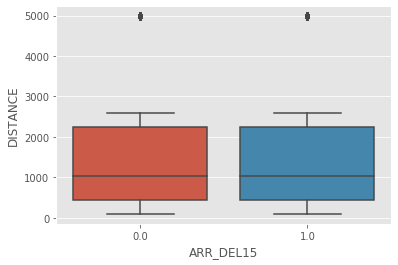

In [61]:
sns.boxplot(data=df, x='ARR_DEL15', y='DISTANCE')

Violin plots allow to evaluate whether the variable distribution changes between different values of the targe. 


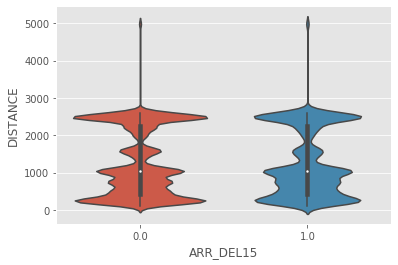

In [62]:
sns.violinplot(data=df, x='ARR_DEL15', y='DISTANCE')

### CATEGORICAL VARIABLES

#### Variable ORIGIN_STATE_NM

It's common that seaborn functions allow to split by variable values (if it is categorical) using the 'hue' parameter. 

In [63]:
sns.countplot?

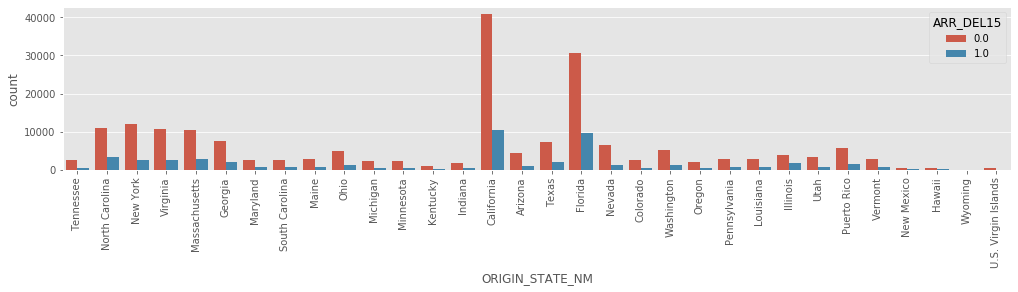

In [64]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='ORIGIN_STATE_NM', hue='ARR_DEL15')

But very often the plot is only the first step to identify potential differences (but remember that looking at absolute numbers might misleading sometimes). We'll probably have to look at the numerical values afterwards. A **pivot table** of the DataFrame allows us to evaluate aggregated results, using the aggregation methods that we are already familiar with (len, sum, mean, etc.)

Are flights across destinatinations delayed in a similar way? Are some destinations airports subject to more delays? 

In [65]:
df.pivot_table(index='ORIGIN_STATE_NM', values='ARR_DEL15', aggfunc=[len, sum, np.mean]).sort_values(by=[('mean','ARR_DEL15')], ascending = False)

,len,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
ORIGIN_STATE_NM,,,
Illinois,"5,647.00","1,705.00",0.30
Hawaii,754.00,222.00,0.29
New Mexico,602.00,148.00,0.25
Wyoming,29.00,7.00,0.24
Florida,"40,488.00","9,747.00",0.24
North Carolina,"14,434.00","3,410.00",0.24
Georgia,"9,534.00","2,059.00",0.22
Texas,"9,322.00","2,012.00",0.22


The **crosstab** method is also very useful for quick counts

In [66]:
pd.crosstab(df['ORIGIN_STATE_NM'], df['ARR_DEL15'])

ARR_DEL15,0.00,1.00
ORIGIN_STATE_NM,,
Arizona,4439,1021
California,40725,10412
Colorado,2492,580
Florida,30741,9747
Georgia,7475,2059
Hawaii,532,222
Illinois,3942,1705
Indiana,1716,370
Kentucky,1096,299


We've carried out an illustrative but quick exercise of univariate analysis, but we've only focus in a few points and in some of the variables in the dataset. There is plenty of work to be done here yet. You are encouraged to continue the analysis on your own. There are plenty of notebooks available that you could use as a reference in Kaggle. This one could be a good one to start: https://www.kaggle.com/ash316/eda-to-prediction-dietanic

## MLC3: Data Preparation<a class="anchor" id="data_preparation"></a>


### MLC3.1: Data Cleaning<a class="anchor" id="data_cleaning"></a>


### 3.1.1. Dealing with variable types<a class="anchor" id="dealing_variable_types"></a>

#### From numeric to categorical

Decision trees need variables in a numeric format. However, there are caes in which numeric variables do not have an ordinal interpretation. These variables need to be transformed in order for them to be handled as a categorical variable. 

For example, the OP_CARRIER_AIRLINE_ID has a numeric format. However, that variable has no ordinal interpretation (and should not be interpreted as such). It just contains an ID code for each airline. We need to be careful, that variable needs to be transformed into a categorical variable (i.e. it should not be interpreted by the model as a numerical one)

In [67]:
df['AIRLINE'] = df['OP_CARRIER_AIRLINE_ID'].astype(object)

In [68]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
TAIL_NUM,235143,2645,N110AN,761
AIRLINE,"237,644.00",11.00,"20,409.00","78,587.00"


The created AIRLINE variable has 11 unique values, and the airline with ID 20409 is the most frequent one (78587 records)

We can exclude (drop) the OP_CARRIER_AIRLINE_ID variable.

In [69]:
df.drop?


There are two important parameters in the drop function:
1. **axis**: Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
2. **inplace**: If False, return a copy. Otherwise, do operation inplace and return None.

In [70]:
df.drop('OP_CARRIER_AIRLINE_ID', axis=1, inplace=True)

### 3.1.2. Imputation of null values<a class="anchor" id="nulls_imputation"></a>

#### Imputation of null values in categorical variables

We need to first identify variables with null values, and numbers of null values per variable

In [71]:
df.select_dtypes(include=['object']).isnull().sum()

DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
TAIL_NUM            15009
AIRLINE             12508
dtype: int64

##### Imputation of null values in categorical variables --> TAIL_NUM


The TAIL_NUM variable has 15009 null values. We can check its variable distribution with value_counts

In [72]:
df['TAIL_NUM'].value_counts(dropna=False)

NaN       15009
N110AN      761
N113AN      751
N111ZM      748
N115NN      740
          ...  
N820AW        1
N323RM        1
N939DN        1
N149AN        1
N244PS        1
Name: TAIL_NUM, Length: 2646, dtype: int64

In [73]:
pd.DataFrame.fillna?

How do we deal with NA values? The method **fillna()** from pandas (for Series or DataFrames) allows to replace the nulls with specific values. Don't forget the "inplace" parameter! 

We could decide to fill nas in the TAIL_NUM variable with the most common value. However, there are cases in which the presence of nulls might contain relevant information for the model. It's very often convenient to create a null category (different than the rest)

In [74]:
df['TAIL_NUM'].fillna(value='ZZZ', inplace=True)

In [75]:
df.select_dtypes(include=['object']).isnull().sum()

DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
TAIL_NUM                0
AIRLINE             12508
dtype: int64

If we are planning to apply one-hot-encodings on the categorical variable (we frequently are), we don't necessarily need to create this additional category for the null values. If we don't believe that the null values might be relevant, we can just ignore them. The one-hot-encoding method won't create a specific column for them. 


##### Imputation of null values in categorical variables --> AIRLINE


In [76]:
df['AIRLINE'].value_counts(dropna=False)

20,409.00    78587
19,790.00    58894
20,363.00    40833
19,805.00    30694
nan          12508
20,398.00     8814
19,930.00     8591
20,452.00     5044
20,304.00     3993
21,171.00      944
19,690.00      695
20,397.00      555
Name: AIRLINE, dtype: int64

In [77]:
df['AIRLINE'].fillna(value='ZZZ', inplace=True)

##### #### Imputation of null values in numeric variables

In [78]:
df.select_dtypes(include=['number']).isnull().sum()

ARR_DEL15               0
CRS_ARR_TIME            0
CRS_DEP_TIME            0
CRS_ELAPSED_TIME        0
DISTANCE                0
TAXI_OUT            17511
dtype: int64

With numeric variables, we have at least 3 options:

1. Fill nas with specific values (e.g. 0, extreme value) 
2. Fill nas with distribution statistics (e.g. mean, median) 
3. Remove rows with na values



##### Imputation of null values in numeric variables --> TAXI_OUT


For this problem, we'll fill nas in the TAXI_OUT variable by an extreme value, as we'll be working with trees. This is not a valid approach for other type of algorithms! 


In [79]:
df['TAXI_OUT'].fillna(value=-99999, inplace=True)

In [80]:
df.select_dtypes(include=['number']).isnull().sum()

ARR_DEL15           0
CRS_ARR_TIME        0
CRS_DEP_TIME        0
CRS_ELAPSED_TIME    0
DISTANCE            0
TAXI_OUT            0
dtype: int64

This is how our final DataFrame looks like:

In [81]:
df.head().T

,0,1,2,3,4
ARR_DEL15,0.00,0.00,0.00,0.00,0.00
CRS_ARR_TIME,1719,1541,1709,1845,1454
CRS_DEP_TIME,1359,1354,1529,1704,1325
CRS_ELAPSED_TIME,140.00,107.00,100.00,101.00,89.00
DEST,JFK,JFK,JFK,JFK,JFK
DEST_CITY_NAME,"New York, NY","New York, NY","New York, NY","New York, NY","New York, NY"
DEST_STATE_NM,New York,New York,New York,New York,New York
DISTANCE,765.00,427.00,301.00,290.00,187.00
FL_DATE,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00
ORIGIN,BNA,RDU,BUF,ORF,BOS


### 3.1.4. Elimination of features with low variance<a class="anchor" id="low_variance"></a>

We already know that three of our variables have 0 variance: DEST, DEST_CITY_NAME y DEST_STATE_NM (all our registers have JFK as their destination). Variables without variance give no information to the model, and they can be therefore excluded.

Let's make sure that those 3 are the only ones we have

In [82]:
df.apply(lambda x: x.nunique(), axis=0)

ARR_DEL15              2
CRS_ARR_TIME        1260
CRS_DEP_TIME        1200
CRS_ELAPSED_TIME     329
DEST                   1
DEST_CITY_NAME         1
DEST_STATE_NM          1
DISTANCE              70
FL_DATE              730
ORIGIN                72
ORIGIN_CITY_NAME      70
ORIGIN_STATE_NM       32
TAIL_NUM            2646
TAXI_OUT             155
AIRLINE               12
dtype: int64

In [83]:
non_variance_features = ['DEST','DEST_CITY_NAME','DEST_STATE_NM']

In [84]:
df.drop(non_variance_features, axis=1, inplace=True)

### MLC3.2: Data transformation<a class="anchor" id="data_transformation"></a>
### 3.2.1. Transformation of categorical variables<a class="anchor" id="transformation_categorical"></a>

One-hot encodings make sense for variables with a reasonable number of different values. However, if a categorical variable has too many possible values, we might need to think about transforming its distribution first 

In [85]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
TAIL_NUM,250152,2646,ZZZ,15009
AIRLINE,"250,152.00",12.00,"20,409.00","78,587.00"


Variables AIRLINE, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_NM are ideal candidates for one-hot-encoding. They'll result in a total of 184 variables, totally fine for the decision tree and for a regular desktop computer. 

However, the variable TAIL_NUM has 2647 different values. We'll need to carry out a more thorough analysis for this variable. 

#### a1) Analysis of TAIL_NUMBER

In [86]:
df.pivot_table(index='TAIL_NUM', values='ARR_DEL15', aggfunc=[len, sum, np.mean]).sort_values(by=[('mean','ARR_DEL15')], ascending = False)

,len,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
TAIL_NUM,,,
N773XF,1.00,1.00,1.00
N144AN,2.00,2.00,1.00
N812NW,1.00,1.00,1.00
N806SK,1.00,1.00,1.00
N806AW,1.00,1.00,1.00
...,...,...,...
N711UW,1.00,0.00,0.00
N523VA,1.00,0.00,0.00


If the dataset is ordered by the fraction of delays per TAIL_NUM, we can observe highest fractions of delays in flights with lowest number of flights. Wrong way to display our data! 

Let's order by number of flights. Planes with lower numbers of flights will generate variables with very low variance (most of the values for the associated one-hot-encoding variable will be 0s!)

In [87]:
df.pivot_table(index='TAIL_NUM', values='ARR_DEL15', aggfunc=[len, sum, np.mean]).sort_values(by=[('len','ARR_DEL15')], ascending = False)

,len,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
TAIL_NUM,,,
ZZZ,"15,009.00","3,109.00",0.21
N110AN,761.00,164.00,0.22
N113AN,751.00,134.00,0.18
N111ZM,748.00,162.00,0.22
N109NN,740.00,118.00,0.16
...,...,...,...
N745VJ,1.00,0.00,0.00
N744P,1.00,0.00,0.00


Alright, the plane with highest number of flights is the TAIL_NUM N110AN, with 759 records. This represents only a 0.3% of the whole dataset. A one-hot-encoding of this variable will not be very helpful for the model. A frequency encoding would be a much better alternative here.

#### a2) Frequency encoding for TAIL_NUMBER

We are counting the number of flights per TAIL_NUM, and we'll replace the TAIL_NUM id by that value. This approach allow us to replace the categorical variable by a numerical variable. In addition, we might manage to keep implicit information about each plane, if number of flights was to be correlated with plane age (we don't know)

In [88]:
df_tail_num = pd.DataFrame(df['TAIL_NUM'].value_counts(dropna = False))
df_tail_num.columns = ['TAIL_NUM_COUNT']
df_tail_num['TAIL_NUM'] = df_tail_num.index

In [89]:
df_tail_num.head()

,TAIL_NUM_COUNT,TAIL_NUM
ZZZ,15009,ZZZ
N110AN,761,N110AN
N113AN,751,N113AN
N111ZM,748,N111ZM
N115NN,740,N115NN


df_tail_num contains the number of flights per plane. Let's merge it with our original dataframe, and let's drop the TAIL_NUM variable (we won't be using it anymore)

In [90]:
df = df.merge(df_tail_num, on = 'TAIL_NUM')

In [91]:
df.drop('TAIL_NUM', axis = 1, inplace = True)

In [92]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
AIRLINE,"250,152.00",12.00,"20,409.00","78,587.00"


#### b) One-hot-encoding for ORIGIN

In [93]:
_dummy_dataset = pd.get_dummies(df['ORIGIN'], prefix='ORIGIN')

In [94]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [95]:
df.drop(['ORIGIN'],axis=1, inplace=True)

#### c) One-hot-encoding for CITY ORIGIN

In [96]:
_dummy_dataset = pd.get_dummies(df['ORIGIN_CITY_NAME'], prefix='ORIGIN_CITY_NAME')

In [97]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [98]:
df.drop(['ORIGIN_CITY_NAME'],axis=1, inplace=True)

#### d) One-hot-encoding for STATE ORIGIN

In [99]:
_dummy_dataset = pd.get_dummies(df['ORIGIN_STATE_NM'], prefix='ORIGIN_STATE_NM')

In [100]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [101]:
df.drop(['ORIGIN_STATE_NM'],axis=1, inplace=True)

#### e) One-hot-encoding for AIRLINE

In [102]:
_dummy_dataset = pd.get_dummies(df['AIRLINE'], prefix='AIRLINE')

In [103]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [104]:
df.drop(['AIRLINE'],axis=1, inplace=True)

#### f) Final dataframe

In [105]:
df.head().T

,0,1,2,3,4
ARR_DEL15,0.00,0.00,0.00,0.00,1.00
CRS_ARR_TIME,1719,1158,1454,711,1930
CRS_DEP_TIME,1359,1021,1325,600,1715
CRS_ELAPSED_TIME,140.00,97.00,89.00,71.00,135.00
DISTANCE,765.00,340.00,187.00,94.00,636.00
FL_DATE,2018-02-01 00:00:00,2018-02-03 00:00:00,2018-02-06 00:00:00,2018-02-08 00:00:00,2018-02-11 00:00:00
TAXI_OUT,27.00,11.00,31.00,19.00,11.00
TAIL_NUM_COUNT,340,340,340,340,340
ORIGIN_ABQ,0,0,0,0,0
ORIGIN_ACK,0,0,0,0,0


In [106]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250152 entries, 0 to 250151
Columns: 194 entries, ARR_DEL15 to AIRLINE_ZZZ
dtypes: datetime64[ns](1), float64(4), int64(3), uint8(186)
memory usage: 61.5 MB


### MLC3.3: Feature engineering<a class="anchor" id="feature_engineering"></a>

There are plenty of new features that we could create for this use case. The feature engineering stage often plays a very important role in helping the model to achieve a better performance. 

We are transforming our FL_DATE variable into a date, and we'll include a few additional time-based variables to our dataframe (might be very helpful for the model): season, year, month, week, weekday.  



In [107]:
df['FL_DATE'].dtypes

dtype('<M8[ns]')

In [108]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [109]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['Season'] = df['FL_DATE'].dt.quarter
df['Year'] = df['FL_DATE'].dt.year
df['Month'] = df['FL_DATE'].dt.month
df['Week'] = df['FL_DATE'].dt.week
df['Weekday'] = df['FL_DATE'].dt.weekday


In [110]:
df.head(1)

,ARR_DEL15,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,DISTANCE,FL_DATE,TAXI_OUT,TAIL_NUM_COUNT,ORIGIN_ABQ,ORIGIN_ACK,...,AIRLINE_20398.0,AIRLINE_20409.0,AIRLINE_20452.0,AIRLINE_21171.0,AIRLINE_ZZZ,Season,Year,Month,Week,Weekday
0,0.00,1719,1359,140.00,765.00,2018-02-01,27.00,340,0,0,...,0,0,0,0,0,1,2018,2,5,3


Careful when working with weekdays. It's important to verify that the first day of the week is the one we'll be working with. In the head above, the 1st of December 2018 was Thursday, and it has a weekday 3 associated. Weekdays start at 0, and values 5 and 6 correspond to Saturdays and Sundays respectively 

In [111]:
df['Weekday'].value_counts(dropna=False)

0    37183
4    36848
3    36679
6    36288
1    35945
2    35443
5    31766
Name: Weekday, dtype: int64

Let's create a weekend variable from the weekday that we have created. It is very possible that the behavior is different during the weekends. We would have to check it. 

In [112]:
df['Weekend'] = (df['Weekday'] >= 5).astype(int)

In [113]:
df.drop('FL_DATE', inplace=True, axis=1)

In [114]:
df['Season'].head()

0    1
1    1
2    1
3    1
4    1
Name: Season, dtype: int64

In [115]:
df['Year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Year, dtype: int64

In [116]:
df['Month'].head()

0    2
1    2
2    2
3    2
4    2
Name: Month, dtype: int64

## MLC4. Modelling<a class="anchor" id="modelling"></a>

### MLC4.1. Dataset partition and sampling<a class="anchor" id="dataset_partition"></a>

We need to import a few libraries for validation strategies and model selection that we had not imported so far:  **model_selection** and **metrics** from scikit-learn. 

In [117]:
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics

If we check the documentation we can see the validation strategies available in **model_selection**, including random holdout (**train_test_split**), k-fold-validation (**KFold**), or LeaveOneOut. 

In [118]:
model_selection??

### a) Train/validation split  

This dataset is partitioned by dates (i.e. we have records by date, time and TAIL_NUM). In this type of problems, the best choice is to keep the most recent records as validation set. If the behavior of the target variable can vary across time, do not forget that our test set needs to resemble as close as possible the scenario that we'd like our model to perform on (i.e. the most recent, the better). 

Let's check the number of partitions per year to decide what partitions we'll separate as test set for the problem. 

In [119]:
df['Year'].value_counts()

2018    125483
2019    124669
Name: Year, dtype: int64

It's also a good idea to evaluate the ratio of delays for each year-month partition. If there is a strong variation, that variation has to be taken into account. 

In [120]:
df.pivot_table(index=['Year','Month'], values='ARR_DEL15', aggfunc=[len, sum, np.mean])

len       sum      mean
           ARR_DEL15 ARR_DEL15 ARR_DEL15
Year Month                              
2018 1      9,244.00  1,968.00      0.21
     2      9,115.00  1,418.00      0.16
     3      9,927.00  1,825.00      0.18
     4     10,393.00  2,184.00      0.21
     5     10,915.00  2,478.00      0.23
     6     11,052.00  2,504.00      0.23
     7     11,201.00  3,463.00      0.31
     8     11,202.00  3,345.00      0.30
     9     10,591.00  2,304.00      0.22
     10    10,952.00  1,628.00      0.15
     11    10,194.00  2,138.00      0.21
     12    10,697.00  2,199.00      0.21
2019 1     10,245.00  2,154.00      0.21
     2      9,381.00  1,817.00      0.19
     3     11,084.00  1,812.00      0.16
     4     10,308.00  2,236.00      0.22
     5     10,797.00  2,122.00      0.20
     6     10,543.00  2,743.00      0.26
     7     10,661.00  2,735.00      0.26
     8     10,782.00  2,912.00      0.27
     9     10,120.00  1,544.00      0.15
     10    10,426.00  1,418.00      0.14
     11     9,937.00  1,205.00      0.12
     12    10,385.00  2,480.00      0.24

We will use the last 6 months from 2019 as validation set, and we will train our model with the partitions from 2018 and the six first months from 2019.  

In [121]:
dev_df = df[(df['Year'] == 2018) | (df['Month'] < 7) ] # development = train + test
val_df = df[(df['Year'] == 2019) & (df['Month'] >= 7)] # validation

In [122]:
dev_df.shape

(187841, 199)

In [123]:
val_df.shape

(62311, 199)

Once we have our partitions, we are going to store all the features and the target as X and y variables. 

In [124]:
dev_df_X = dev_df.drop('ARR_DEL15', axis=1)
dev_df_y = dev_df[['ARR_DEL15']]

In [125]:
val_df_X = val_df.drop('ARR_DEL15', axis=1)
val_df_y = val_df[['ARR_DEL15']]

In [126]:
dev_df_X.head().T

,0,1,2,3,4
CRS_ARR_TIME,"1,719.00","1,158.00","1,454.00",711.00,"1,930.00"
CRS_DEP_TIME,"1,359.00","1,021.00","1,325.00",600.00,"1,715.00"
CRS_ELAPSED_TIME,140.00,97.00,89.00,71.00,135.00
DISTANCE,765.00,340.00,187.00,94.00,636.00
TAXI_OUT,27.00,11.00,31.00,19.00,11.00
TAIL_NUM_COUNT,340.00,340.00,340.00,340.00,340.00
ORIGIN_ABQ,0.00,0.00,0.00,0.00,0.00
ORIGIN_ACK,0.00,0.00,0.00,0.00,0.00
ORIGIN_ATL,0.00,0.00,0.00,0.00,0.00
ORIGIN_AUS,0.00,0.00,0.00,0.00,0.00


In [127]:
dev_df_y.head().T

,0,1,2,3,4
ARR_DEL15,0.00,0.00,0.00,0.00,1.00


### b) Determine validation strategy (Random Holdout) & partition policy for test set (random) <a class="anchor" id="random_holdout"></a>

In [128]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, 
                                        random_state = 42
                                     )

In [129]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131488 entries, 207503 to 156518
Columns: 198 entries, CRS_ARR_TIME to Weekend
dtypes: float64(3), int64(9), uint8(186)
memory usage: 36.4 MB


In [130]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56353 entries, 91964 to 105925
Columns: 198 entries, CRS_ARR_TIME to Weekend
dtypes: float64(3), int64(9), uint8(186)
memory usage: 15.6 MB


In [131]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
CRS_ARR_TIME,"131,488.00","1,418.96",579.74,1.00,939.00,"1,457.00","1,910.00","2,400.00"
CRS_DEP_TIME,"131,488.00","1,337.92",526.82,4.00,917.00,"1,300.00","1,745.00","2,359.00"
CRS_ELAPSED_TIME,"131,488.00",195.14,97.35,47.00,108.00,167.00,306.00,595.00
DISTANCE,"131,488.00","1,254.49",897.90,94.00,427.00,"1,028.00","2,248.00","4,983.00"
TAXI_OUT,"131,488.00","-7,089.16","25,697.67","-99,999.00",12.00,15.00,21.00,166.00


In [132]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
CRS_ARR_TIME,"56,353.00","1,419.65",580.85,1.00,944.00,"1,457.00","1,912.00","2,400.00"
CRS_DEP_TIME,"56,353.00","1,335.12",525.68,3.00,915.00,"1,300.00","1,740.00","2,359.00"
CRS_ELAPSED_TIME,"56,353.00",195.47,97.49,47.00,108.00,167.00,306.00,595.00
DISTANCE,"56,353.00","1,257.73",900.17,94.00,427.00,"1,028.00","2,248.00","4,983.00"
TAXI_OUT,"56,353.00","-6,912.31","25,400.22","-99,999.00",12.00,15.00,21.00,154.00


In [133]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
ARR_DEL15,"131,488.00",0.21,0.41,0.00,0.00,0.00,0.00,1.00


In [134]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
ARR_DEL15,"56,353.00",0.21,0.41,0.00,0.00,0.00,0.00,1.00


### MLC4.2. Model definition<a class="anchor" id="model_definition"></a>

We are going to need to import a few libraries for the modelling as well. 

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



In [136]:
DecisionTreeClassifier?

We are always using the same procedure to train a model: 

- Instantiate the model (chose algorithm & set parameters)
- Train the model (inference the set of instructions from data) 
- Evaluate model (calculate delay probabilities over a dataset that the model has never seen before, and evaluate performance) 


In [137]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=4, # Important, regulate over-adjustment
                        # min_samples_split=2, # minimum number of observations in each split
                        # min_samples_leaf=1, # minimum number of observations in each leaf 
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )

In [138]:
dt.fit?

In [139]:
### Train model
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

Once we have trained the tree, we can visualize it with *plot_tree*

In [140]:
?tree.plot_tree

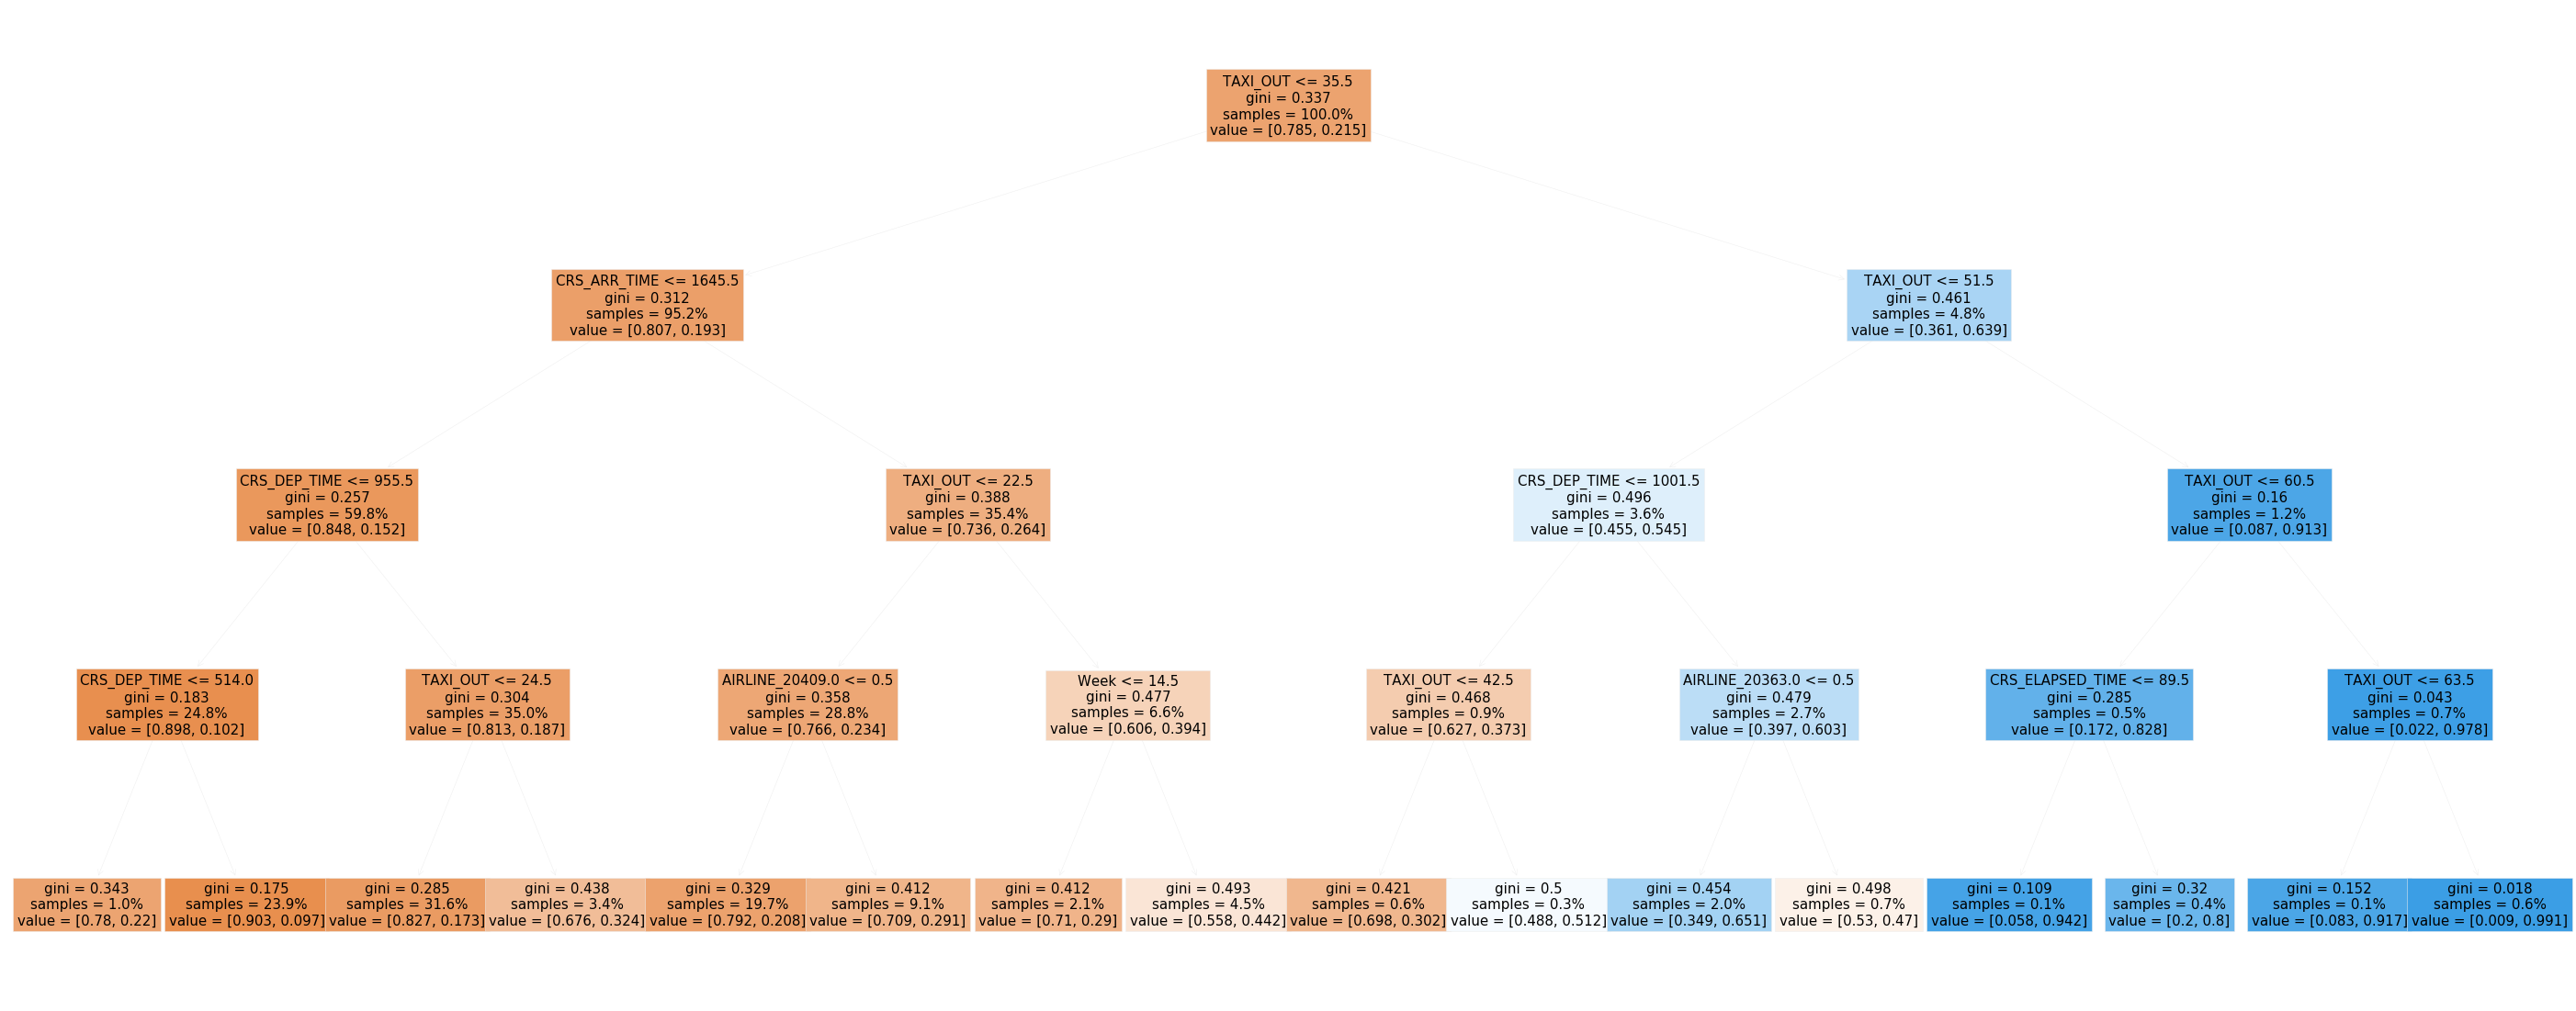

In [141]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(dt, 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               feature_names = X_test.columns);


From the visualization of the tree we can see that the most relevant variable is TAXI_OUT. When it takes values hgiher than 35.5, the probability of delay goes from 0.215 to 0.63, and this applies to 4.8% of the cases. If it is higher than 60.5, the probability goes up to 95%.   

Let's take a look at the feature importances of the trained tree

Text(0.5, 0, 'Random Forest Feature Importance')

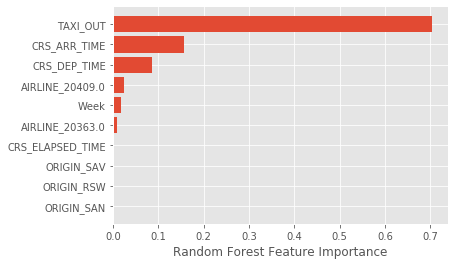

In [142]:
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:], dt.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")


TAXI_OUT is clearly the main variable of the  model. Why is that? Let's carry out a similar univariate analysis to the ones we've done before for other variables. 

In [143]:
df_taxi_out_not_null = df[(df['TAXI_OUT'] >= 0)]

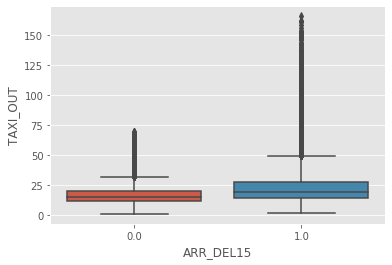

In [144]:
sns.boxplot(data=df_taxi_out_not_null, x='ARR_DEL15', y='TAXI_OUT' )

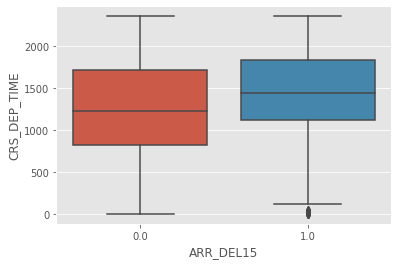

In [145]:
sns.boxplot(data=df, x='ARR_DEL15', y='CRS_DEP_TIME' )

Can we really include the TAXI_OUT variable? If not, why not? 

In [146]:
X_train.drop('TAXI_OUT',axis=1, inplace = True)
X_test.drop('TAXI_OUT',axis=1, inplace=True)
val_df_X.drop('TAXI_OUT',axis=1, inplace=True)

/home/local/FARFETCH/tiago.otto/.virtualenvs/python3/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [147]:
### Train model
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

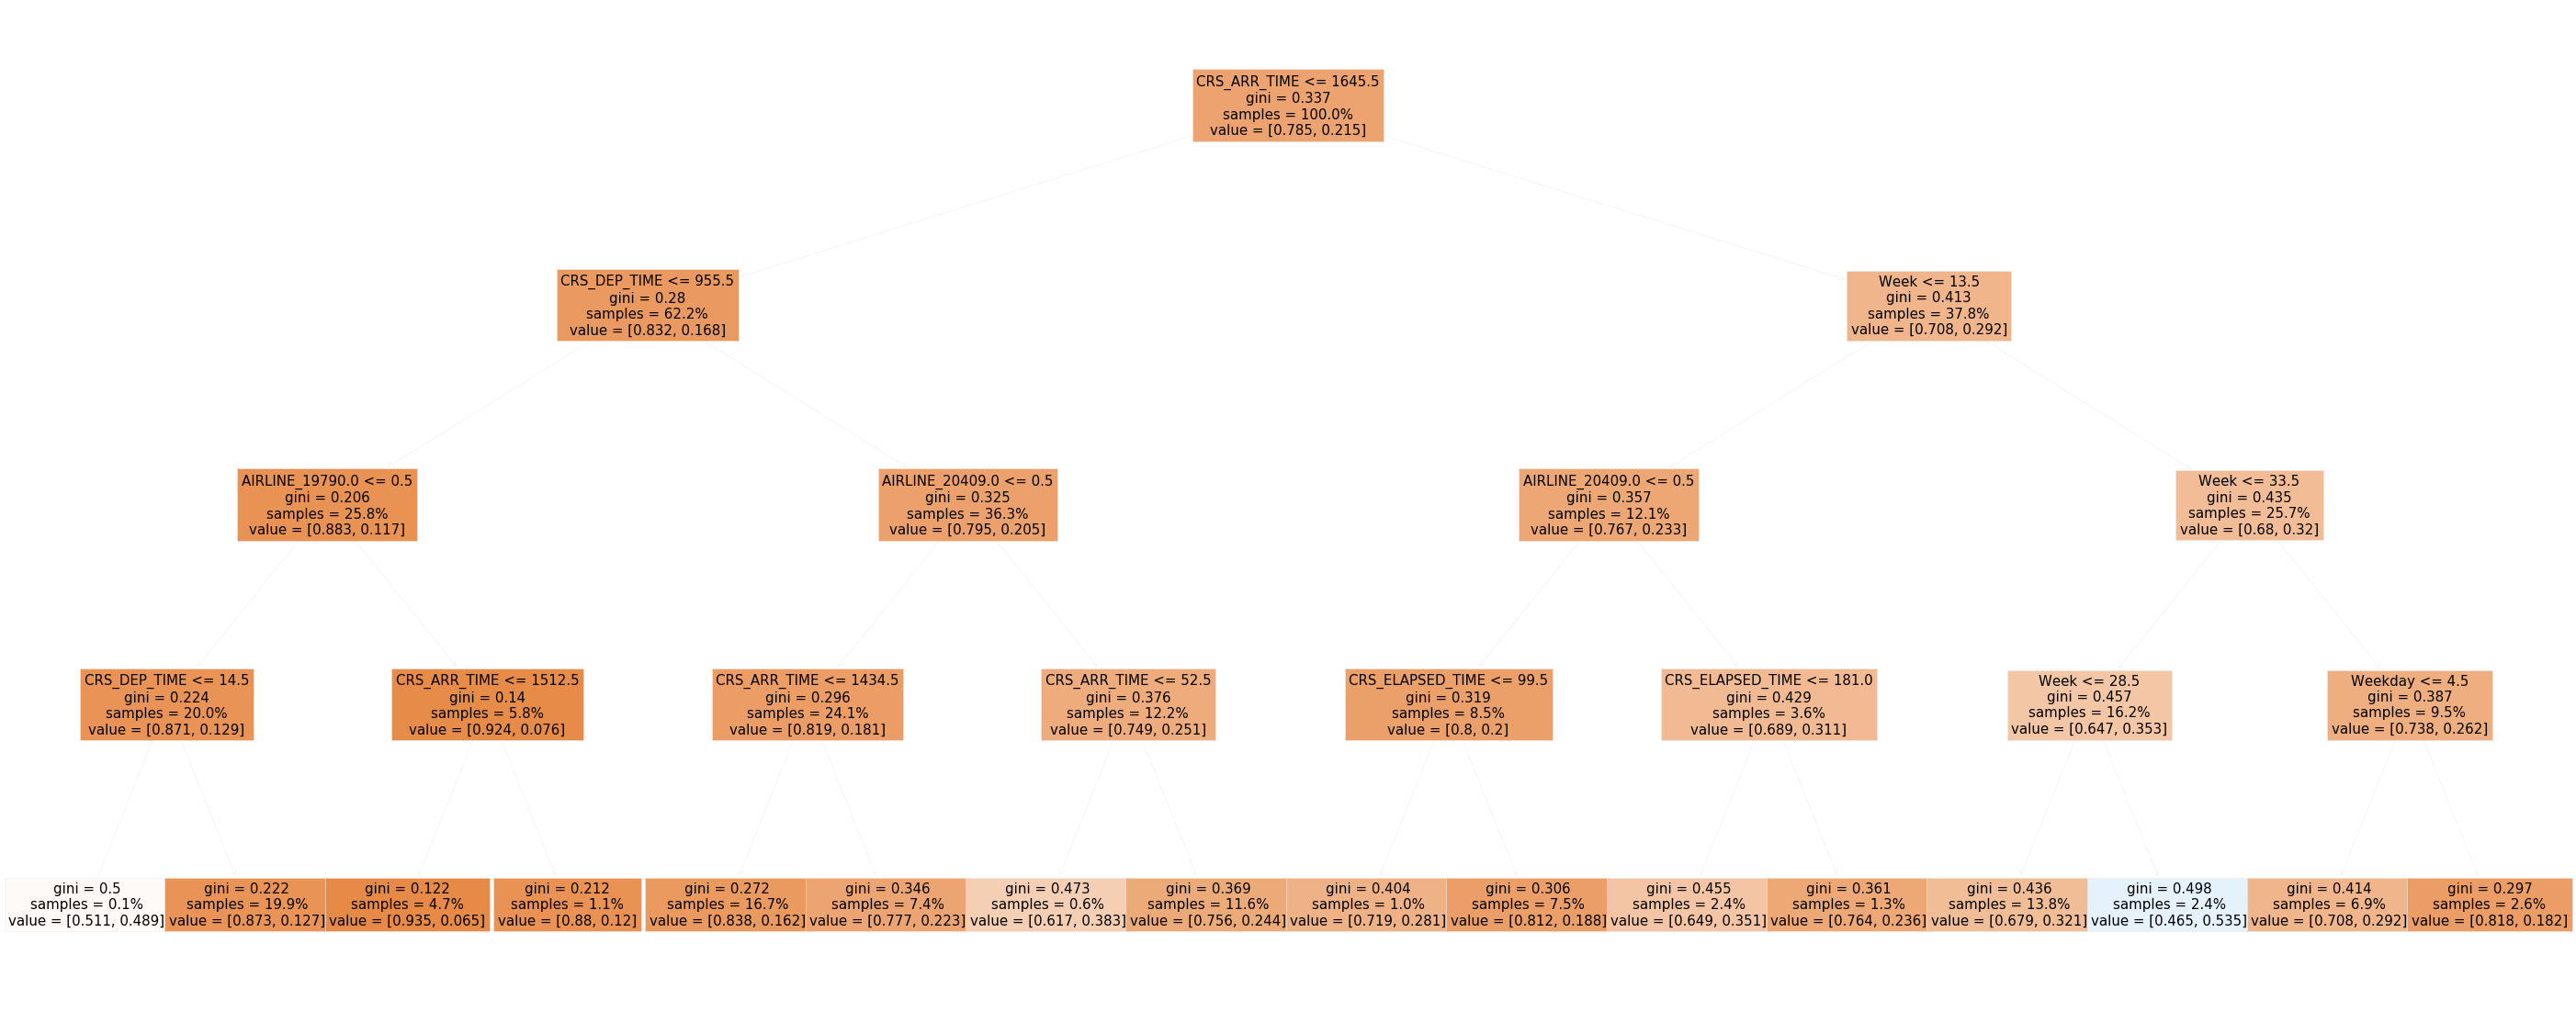

In [148]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(dt, 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               feature_names = X_test.columns);

Text(0.5, 0, 'Random Forest Feature Importance')

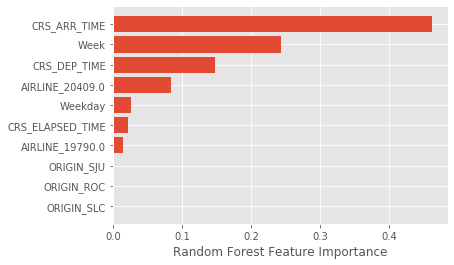

In [149]:
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:], dt.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")


The performance of the model has obviously decreased after excluding the TAXI_OUT variable. That makes sense!

### MLC5. Model evaluation<a class="anchor" id="model_evaluation"></a>

#### MLC5.1 Evaluation over train dataset
#### a) Get predictions for the train set

In [150]:
y_train_pred = pd.DataFrame(dt.predict(X_train), index=y_train.index, columns=['DelayPrediction'])

In [151]:
y_train_pred.head()

,DelayPrediction
207503,0.00
96898,0.00
187218,0.00
200201,0.00
80742,0.00


In [152]:
y_train.head()

,ARR_DEL15
207503,0.00
96898,0.00
187218,1.00
200201,1.00
80742,0.00


In [153]:
y_train.shape

(131488, 1)

In [154]:
y_train_pred.shape

(131488, 1)

In [155]:
results_df = y_train.join(y_train_pred, how= 'inner')

In [156]:
results_df['Success'] = (results_df['ARR_DEL15'] == results_df['DelayPrediction']).astype(int)

In [157]:
results_df.head(20)

,ARR_DEL15,DelayPrediction,Success
207503,0.00,0.00,1
96898,0.00,0.00,1
187218,1.00,0.00,0
200201,1.00,0.00,0
80742,0.00,0.00,1
122458,0.00,0.00,1
141756,1.00,1.00,1
69088,1.00,0.00,0
178722,0.00,0.00,1
73385,0.00,0.00,1


In [158]:
results_df['Success'].count()

131488

In [159]:
results_df['Success'].sum()

103465

In [160]:
results_df['Success'].mean()

0.7868778899975664

In [161]:
print('TRAIN - We have correctly predicted {} from a total of {}. The accuracy is {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

TRAIN - We have correctly predicted 103465 from a total of 131488. The accuracy is 0.7868778899975664.


It really seems that the model is doing an ok job. But are we being able to predict correctly delayed flights? Or are we rather only predicting correctly non-delayed flights?

#### b) Confusion matrix

In [162]:
confusion_matrix = pd.crosstab(results_df['ARR_DEL15'], results_df['DelayPrediction'])


In [163]:
confusion_matrix

DelayPrediction,0.00,1.00
ARR_DEL15,,
0.00,101753,1486
1.00,26537,1712


In [164]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [165]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

accuracy

0.7868778899975664

In [166]:
Precision = TP / (TP+FP)
Recall = TP/(TP+FN)
print(Precision)
print(Recall)


0.535334584115072
0.06060391518283833


From the total number of positives predicted, 55% are indeed delayed
From the total number of positives in the dataset, I'm only capturing 6% (not good!)

#### c) Using the metrics module

In [167]:
confusion_matrix_m = metrics.confusion_matrix(results_df['ARR_DEL15'],results_df['DelayPrediction'])
Accuracy_m = metrics.accuracy_score(results_df['ARR_DEL15'], results_df['DelayPrediction'])
Precision_m = metrics.precision_score(results_df['ARR_DEL15'],results_df['DelayPrediction'])
Recall_m = metrics.recall_score(results_df['ARR_DEL15'],results_df['DelayPrediction'])

print("Confusion matrix: ", confusion_matrix_m)
print("Accuracy: ", Accuracy_m)
print("Precision: ", Precision_m)
print("Recall: ", Recall_m)


Confusion matrix:  [[101753   1486]
 [ 26537   1712]]
Accuracy:  0.7868778899975664
Precision:  0.535334584115072
Recall:  0.06060391518283833


#### d) Using the model

In [168]:
dt.score(X_test, y_test)

0.7881390520469186

#### MLC5.2 Evaluation over test dataset
#### a) Get predictions for the test set

In [169]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['DelayPrediction'])

In [170]:
results_df_test = y_test.join(y_test_pred, how= 'inner')
results_df_test['Success'] = (results_df_test['ARR_DEL15'] == results_df_test['DelayPrediction']).astype(int)

In [171]:
confusion_matrix_m_test = metrics.confusion_matrix(results_df_test['ARR_DEL15'],results_df_test['DelayPrediction'])
Accuracy_m_test = metrics.accuracy_score(results_df_test['ARR_DEL15'], results_df_test['DelayPrediction'])
Precision_m_test = metrics.precision_score(results_df_test['ARR_DEL15'],results_df_test['DelayPrediction'])
Recall_m_test = metrics.recall_score(results_df_test['ARR_DEL15'],results_df_test['DelayPrediction'])

print("Confusion matrix: ", confusion_matrix_m_test)
print("Accuracy: ", Accuracy_m_test)
print("Precision: ", Precision_m_test)
print("Recall: ", Recall_m_test)


Confusion matrix:  [[43647   617]
 [11322   767]]
Accuracy:  0.7881390520469186
Precision:  0.5541907514450867
Recall:  0.0634461080320953


#### e) Validation across months (seasonality)

Let's create month and year columns in the results dataset

In [172]:
results_df_test['Year'] = X_test['Year']

In [173]:
results_df_test['Month'] = X_test['Month']

In [174]:
results_df_test.head()

,ARR_DEL15,DelayPrediction,Success,Year,Month
91964,1.00,0.00,0,2018,2
205250,1.00,0.00,0,2018,12
156190,0.00,0.00,1,2018,10
117192,0.00,0.00,1,2018,12
33706,0.00,0.00,1,2019,3


In [175]:
results_df_test.pivot_table(index=['Year', 'Month'], values='Success', aggfunc=[len, sum, np.mean])

len     sum    mean
           Success Success Success
Year Month                        
2018 1        2796    2185    0.78
     2        2694    2278    0.85
     3        2900    2378    0.82
     4        3132    2471    0.79
     5        3245    2507    0.77
     6        3356    2556    0.76
     7        3327    2346    0.71
     8        3444    2509    0.73
     9        3155    2486    0.79
     10       3300    2816    0.85
     11       3042    2437    0.80
     12       3196    2530    0.79
2019 1        3117    2481    0.80
     2        2814    2271    0.81
     3        3315    2786    0.84
     4        3065    2402    0.78
     5        3305    2673    0.81
     6        3150    2302    0.73

Instead of obtaining the 1/0 predictions from the tree, we can get each register's probability with **predit_proba**. 

In [176]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [177]:
results_df_test = results_df_test.join(y_score)

In [178]:
results_df_test.head(10)

,ARR_DEL15,DelayPrediction,Success,Year,Month,DelayScore
91964,1.00,0.00,0,2018,2,0.22
205250,1.00,0.00,0,2018,12,0.13
156190,0.00,0.00,1,2018,10,0.29
117192,0.00,0.00,1,2018,12,0.16
33706,0.00,0.00,1,2019,3,0.19
82783,1.00,0.00,0,2019,1,0.35
75723,1.00,0.00,0,2018,5,0.32
92264,1.00,0.00,0,2018,5,0.32
78746,0.00,0.00,1,2018,2,0.35
180918,0.00,0.00,1,2019,4,0.24


In [179]:
results_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56353 entries, 91964 to 105925
Data columns (total 6 columns):
ARR_DEL15          56353 non-null float64
DelayPrediction    56353 non-null float64
Success            56353 non-null int64
Year               56353 non-null int64
Month              56353 non-null int64
DelayScore         56353 non-null float64
dtypes: float64(3), int64(3)
memory usage: 5.5 MB


### MLC4.3. Model optimization<a class="anchor" id="model_optimization"></a>

### 4.3.1. Hyperparameter optimization<a class="anchor" id="hyperparameter_optimization"></a>

Let's evaluate how the model's performance varies with different values of the depth parameter

In [180]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Tree max_depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree max_depth: 1. Train: 0.7851591019712826 - Test: 0.7854772594183096
Tree max_depth: 2. Train: 0.7851591019712826 - Test: 0.7854772594183096
Tree max_depth: 3. Train: 0.7851591019712826 - Test: 0.7854772594183096
Tree max_depth: 4. Train: 0.7868778899975664 - Test: 0.7881390520469186
Tree max_depth: 5. Train: 0.7871821002677051 - Test: 0.7867726651642326
Tree max_depth: 6. Train: 0.7885814675103432 - Test: 0.7891327879615992
Tree max_depth: 7. Train: 0.7924221221708445 - Test: 0.7916526183166823
Tree max_depth: 8. Train: 0.793973594548552 - Test: 0.790960552233244
Tree max_depth: 9. Train: 0.7988257483572645 - Test: 0.7931609674728941
Tree max_depth: 10. Train: 0.804666585543928 - Test: 0.7952726562915905
Tree max_depth: 11. Train: 0.8118687636894621 - Test: 0.7945096090713892
Tree max_depth: 12. Train: 0.8216110975906546 - Test: 0.7954146185651163
Tree max_depth: 13. Train: 0.8335133244098321 - Test: 0.7959292318066474
Tree max_depth: 14. Train: 0.8448603674860063 - Test: 0.7931432

It is very clear how the tree progressively overfits the data as the max_depth parameter increases. We'll have to make sure that we are pruning the tree to minimize the overfitting. 

In [181]:
DecisionTreeClassifier??

#### Let's try setting the min_samples_split parameter to 500


In [182]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_split=40)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Tree Depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree Depth: 1. Train: 0.7851591019712826 - Test: 0.7854772594183096
Tree Depth: 2. Train: 0.7851591019712826 - Test: 0.7854772594183096
Tree Depth: 3. Train: 0.7851591019712826 - Test: 0.7854772594183096
Tree Depth: 4. Train: 0.7868778899975664 - Test: 0.7881390520469186
Tree Depth: 5. Train: 0.7871821002677051 - Test: 0.7867726651642326
Tree Depth: 6. Train: 0.7885662569968362 - Test: 0.78915053324579
Tree Depth: 7. Train: 0.7923917011438306 - Test: 0.7916703636008731
Tree Depth: 8. Train: 0.7937910683864687 - Test: 0.7911202597909606
Tree Depth: 9. Train: 0.7980424069116573 - Test: 0.7934094014515642
Tree Depth: 10. Train: 0.8025447189097104 - Test: 0.795893741238266
Tree Depth: 11. Train: 0.8074348990021903 - Test: 0.7961244299327453
Tree Depth: 12. Train: 0.8131692625943052 - Test: 0.7977747413624829
Tree Depth: 13. Train: 0.8201508882939889 - Test: 0.7991056376767874
Tree Depth: 14. Train: 0.8245999634947676 - Test: 0.797189146984189
Tree Depth: 15. Train: 0.8287448284254076 - Tes

#### Let's repeat the evaluation procedure with the best performing estimator

In [183]:
dt = DecisionTreeClassifier(max_depth=11, random_state=42, min_samples_split=50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [184]:
dt.score(X_train, y_train)

0.8068340837186664

In [185]:
dt.score(X_test, y_test)

0.796603552605895

In [186]:
dt.score(val_df_X, val_df_y)

0.7615669785431144

#### We are now also evaluting another type of suitable metrics for the problem such as the F1 score

In [187]:
y_test_pred = pd.DataFrame({'DelayPrediction' : dt.predict(X_test), 
                            'DelayScore': dt.predict_proba(X_test)[:,1]},
                            index=y_test.index)
results_df_test = y_test.join(y_test_pred, how= 'inner')
results_df_test['Success'] = (results_df_test['ARR_DEL15'] == results_df_test['DelayPrediction']).astype(int)

In [188]:
confusion_matrix_m_test = metrics.confusion_matrix(results_df_test['ARR_DEL15'],results_df_test['DelayPrediction'])
Accuracy_m_test = metrics.accuracy_score(results_df_test['ARR_DEL15'], results_df_test['DelayPrediction'])
Precision_m_test = metrics.precision_score(results_df_test['ARR_DEL15'],results_df_test['DelayPrediction'])
Recall_m_test = metrics.recall_score(results_df_test['ARR_DEL15'],results_df_test['DelayPrediction'])
f1_m_test = metrics.f1_score(results_df_test['ARR_DEL15'],results_df_test['DelayPrediction'])

print("Confusion matrix: ", confusion_matrix_m_test)
print("Accuracy: ", Accuracy_m_test)
print("Precision: ", Precision_m_test)
print("Recall: ", Recall_m_test)
print("F1 Score: ", f1_m_test)


Confusion matrix:  [[42743  1521]
 [ 9941  2148]]
Accuracy:  0.796603552605895
Precision:  0.5854456255110384
Recall:  0.1776821904210439
F1 Score:  0.2726234293692093


#### and the ROC curve

In [189]:
print(metrics.roc_auc_score(results_df_test['ARR_DEL15'],results_df_test['DelayScore']))

0.6910005069336572


In [190]:
fpr, tpr, _ = metrics.roc_curve(results_df_test['ARR_DEL15'], results_df_test['DelayScore'])

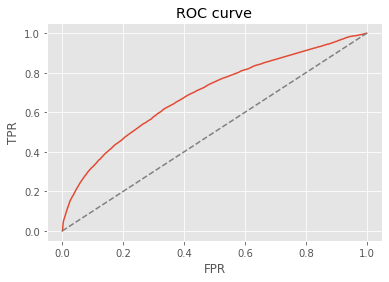

In [191]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#### K-fold validation strategy <a class="anchor" id="k_fold"></a>

We can try the k-fold-validation as an alternative validation strategy

In [192]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=False)

The first alternative is to instantiate the tree, and to use the cross_val_score function to directly obtian the cross-validated accuracy (avg. of 10 iterations)

In [193]:
dt = DecisionTreeClassifier(max_depth=8, random_state=42)
scores = model_selection.cross_val_score(dt, dev_df_X, dev_df_y, cv=kf)

In [194]:
scores

array([0.81527815, 0.82921635, 0.76054089, 0.79876491, 0.80722956,
       0.80563245, 0.79706133, 0.80504685, 0.8042483 , 0.80733603])

In [195]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.803 (+/- 0.033)


The second alternative is to iterate through the cross-validation resulting train/test combinations, and to customize the type of evaluation that we want to do in each iteration

In [196]:
scores_list = []
for train_index, test_index in kf.split(dev_df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dev_df_X.iloc[train_index], dev_df_X.iloc[test_index]
    y_train, y_test = dev_df_y.iloc[train_index], dev_df_y.iloc[test_index]
    dt = DecisionTreeClassifier(max_depth=8, random_state=42)
    dt.fit(X_train, y_train)
    _score = dt.score(X_test, y_test)
    scores_list.append(_score)
    #print(_scores)
scores_list

[0.8152781474580783,
 0.8292163543441227,
 0.7605408858603067,
 0.7987649063032368,
 0.8072295570698467,
 0.8056324531516184,
 0.79706132879046,
 0.8050468483816013,
 0.8042482964224872,
 0.8073360306643952]

In [197]:
np.mean(scores_list)

0.8030354808446154

In [198]:
np.std(scores_list)

0.016563169128700112

### 4.3.2. ENSEMBLE MODELS (alternative models)<a class="anchor" id="ensemble_models"></a>


Ensemble models are an alternative to the classic decision trees that we have been using. They'll help us to reach a higher precision also enhancing its generalization ability. We will test Random Forest and Gradient Boosting algorithms for our current problem

In [199]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### 4.3.2. ENSEMBLE MODELS 
#### a) Random Forest Classifier


In [200]:
RandomForestClassifier??

Let's start training a quick sample random forest with only 3 trees

In [201]:
rf = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42)

In [202]:
rf.fit(
    X=X_train, 
    y=np.ravel(y_train)
)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

The Random Forest generates a list of estimators (base models) with which we could also work as independent trees. They can be accessed using the estimators_ parameter from the model object 


In [203]:
tree_list = rf.estimators_

In [204]:
tree_list

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                        max_features='auto', max_leaf_nodes=None,
                        mi

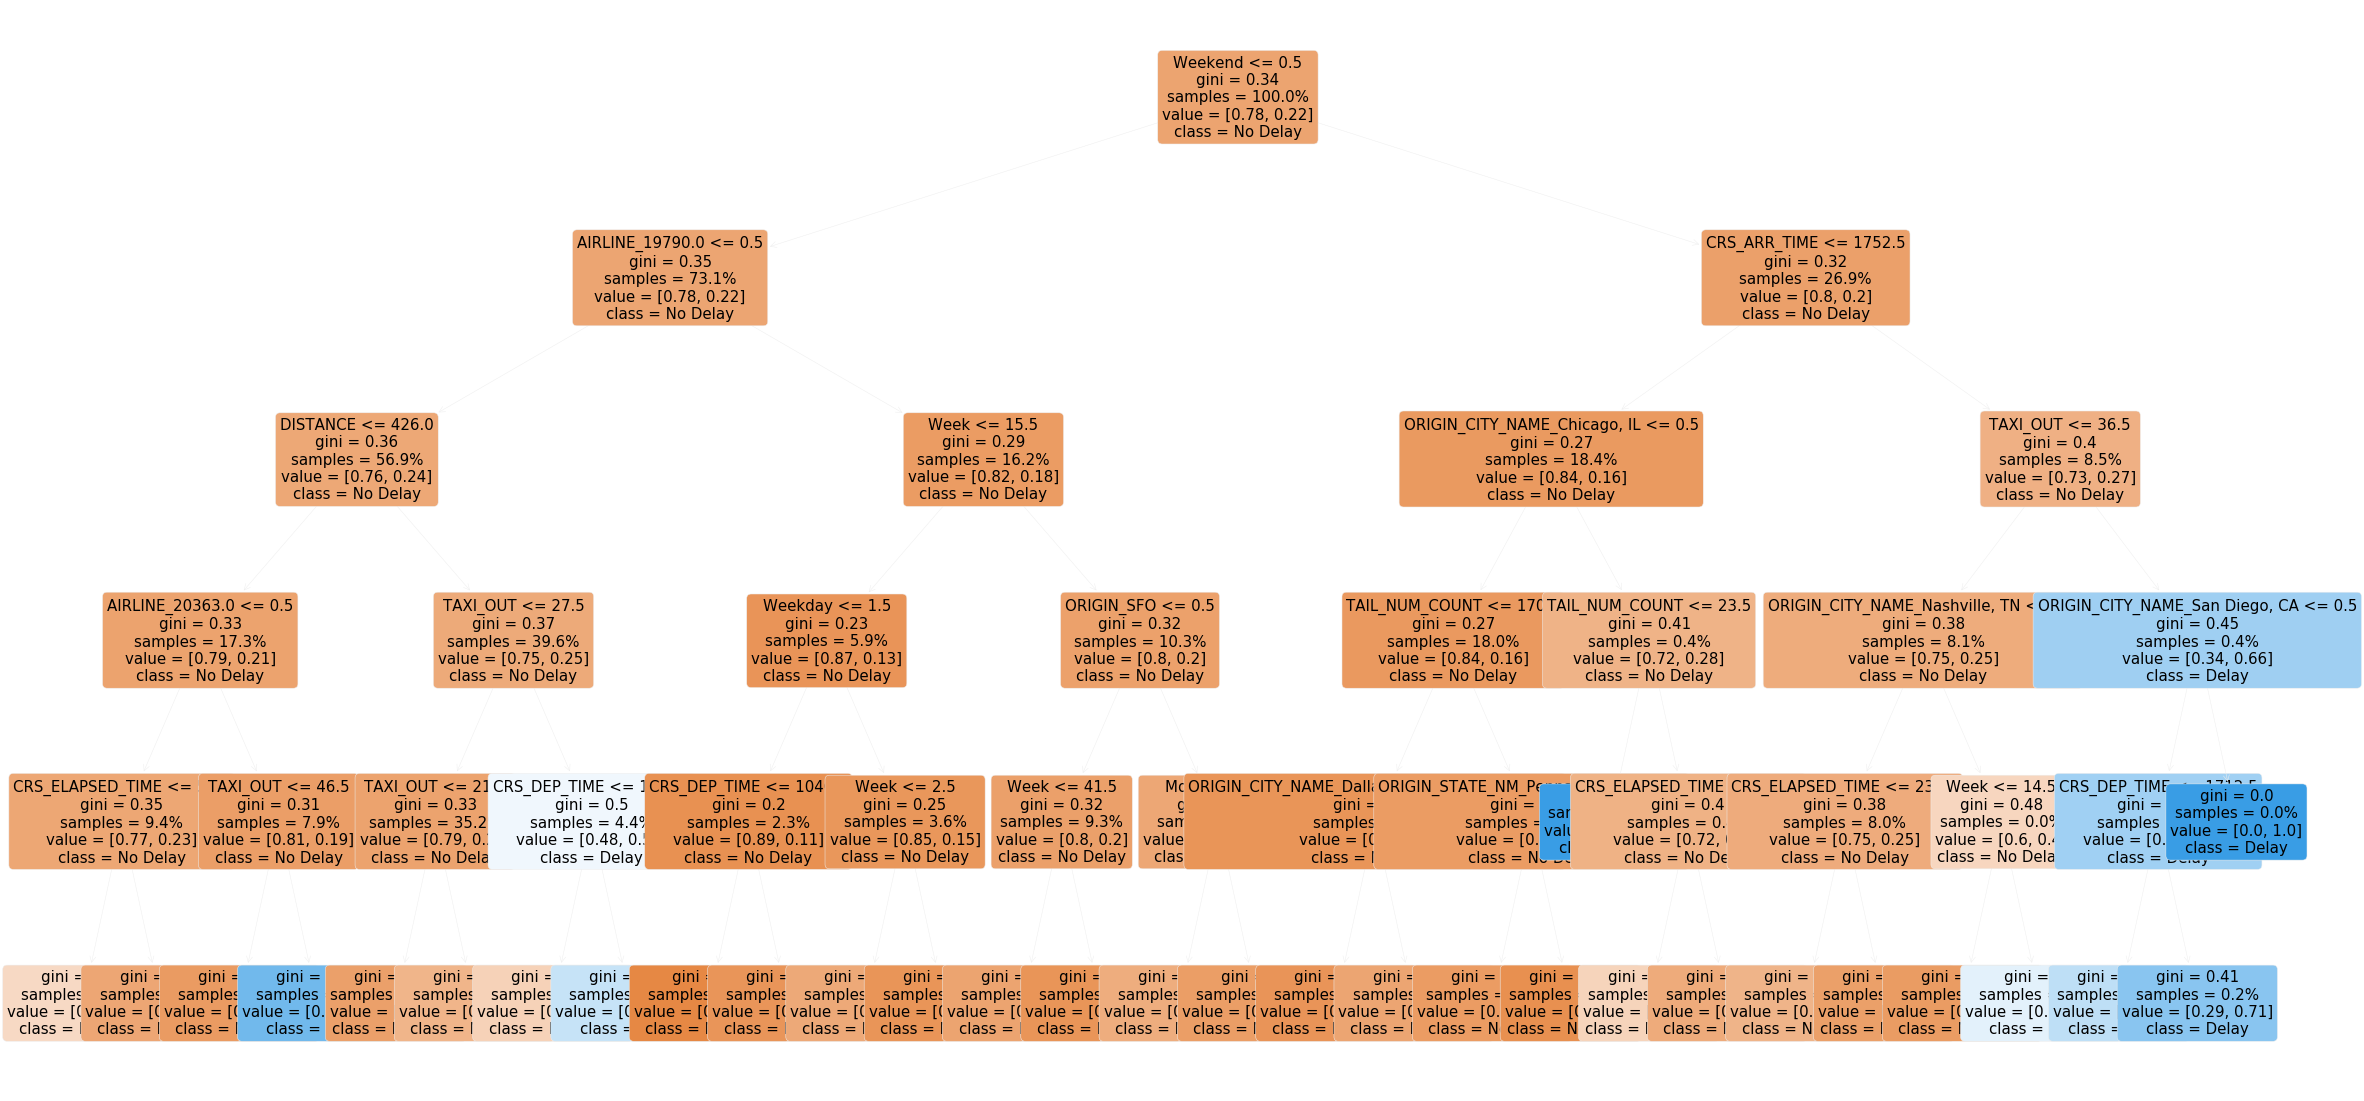

In [205]:
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(tree_list[0], 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               impurity=True,
                rounded = True,
               precision = 2,

               class_names = ['No Delay', 'Delay'],
               feature_names = X_test.columns);

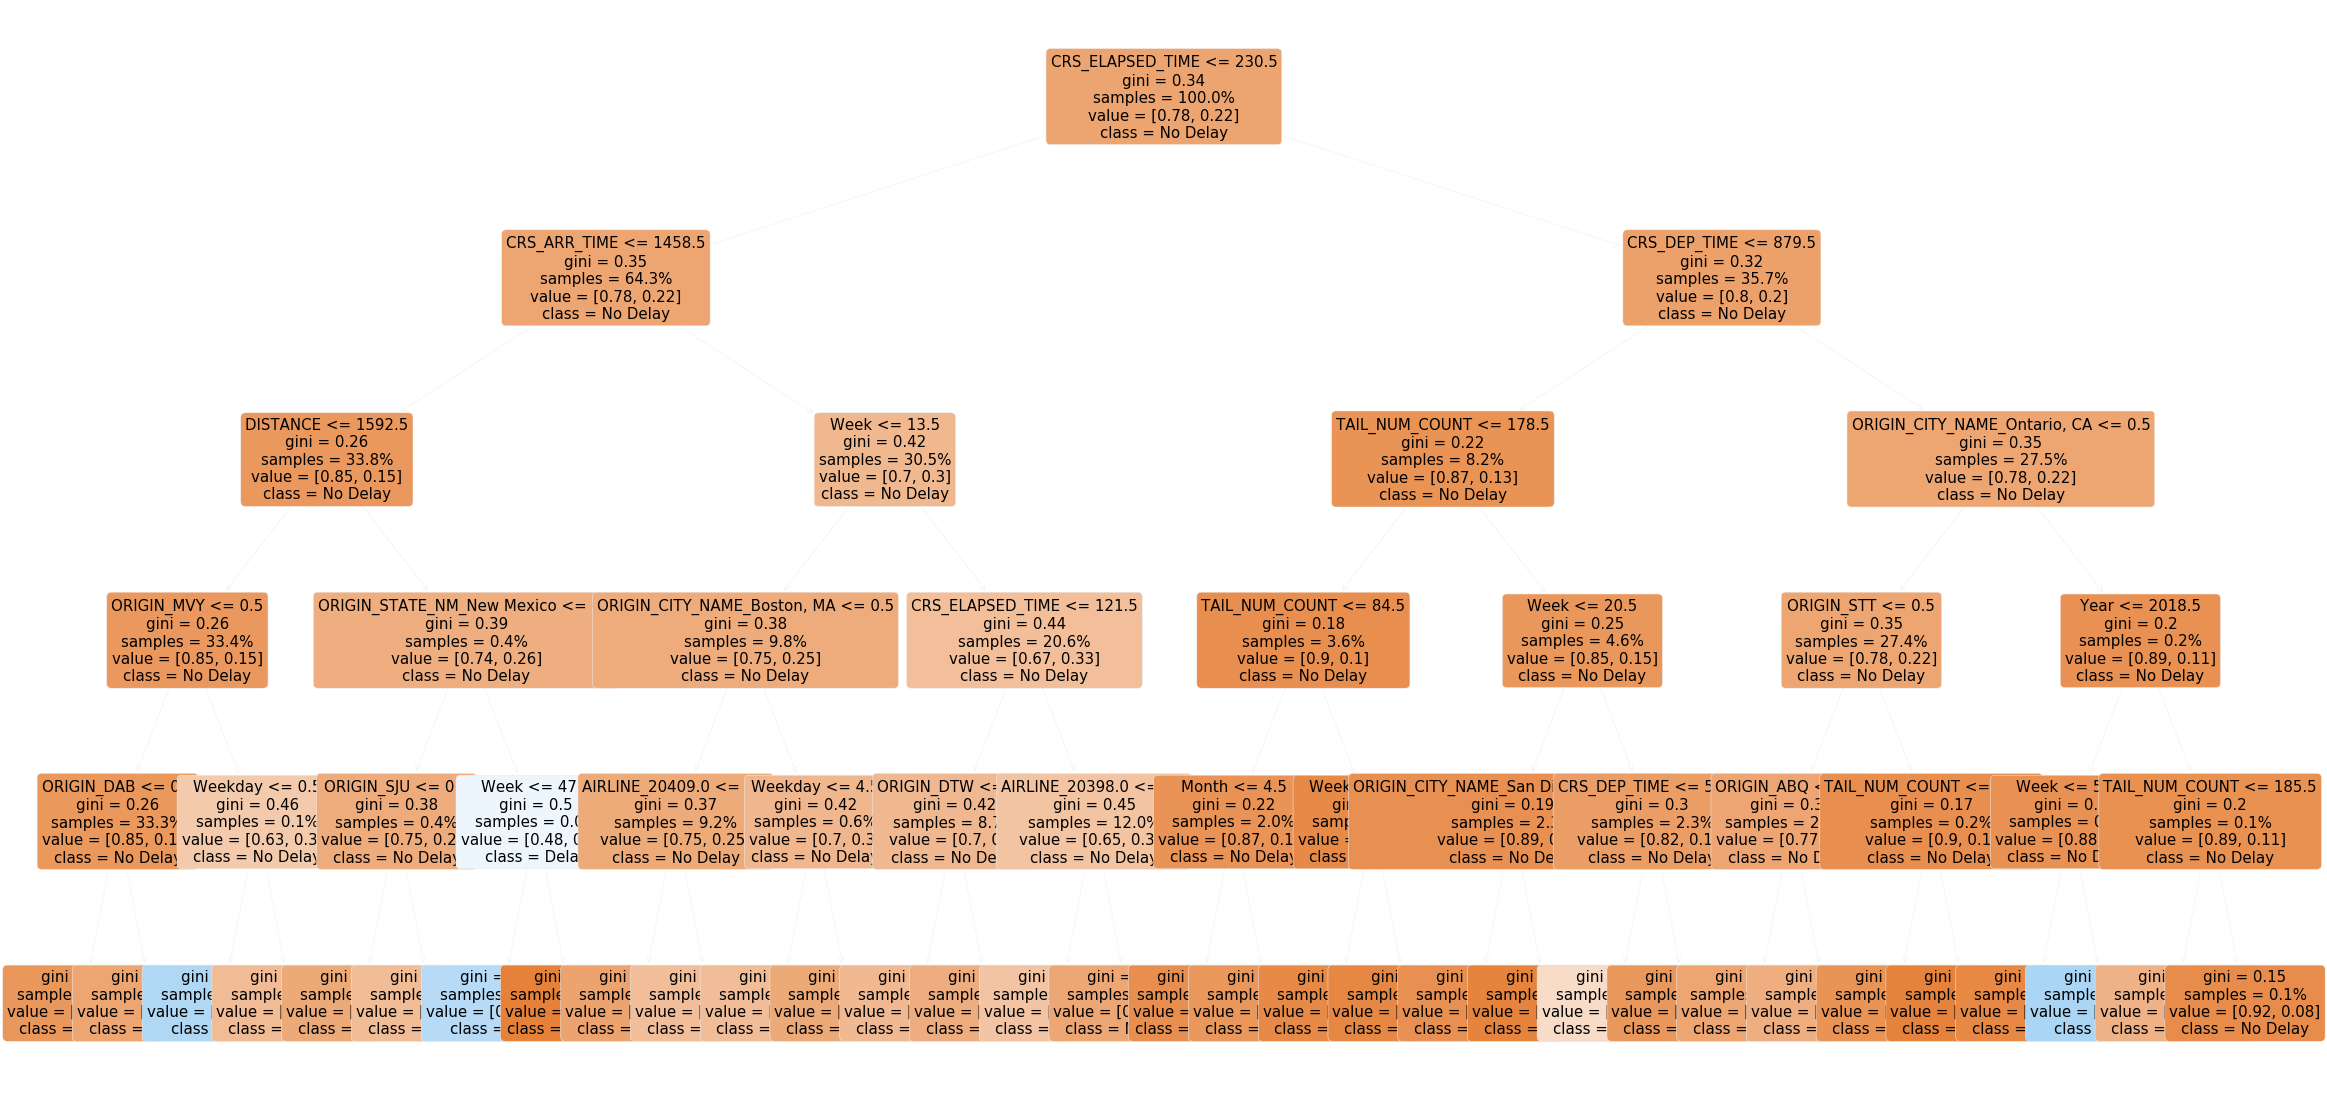

In [206]:
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(tree_list[1], 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               impurity=True,
                rounded = True,
               precision = 2,

               class_names = ['No Delay', 'Delay'],
               feature_names = X_test.columns);

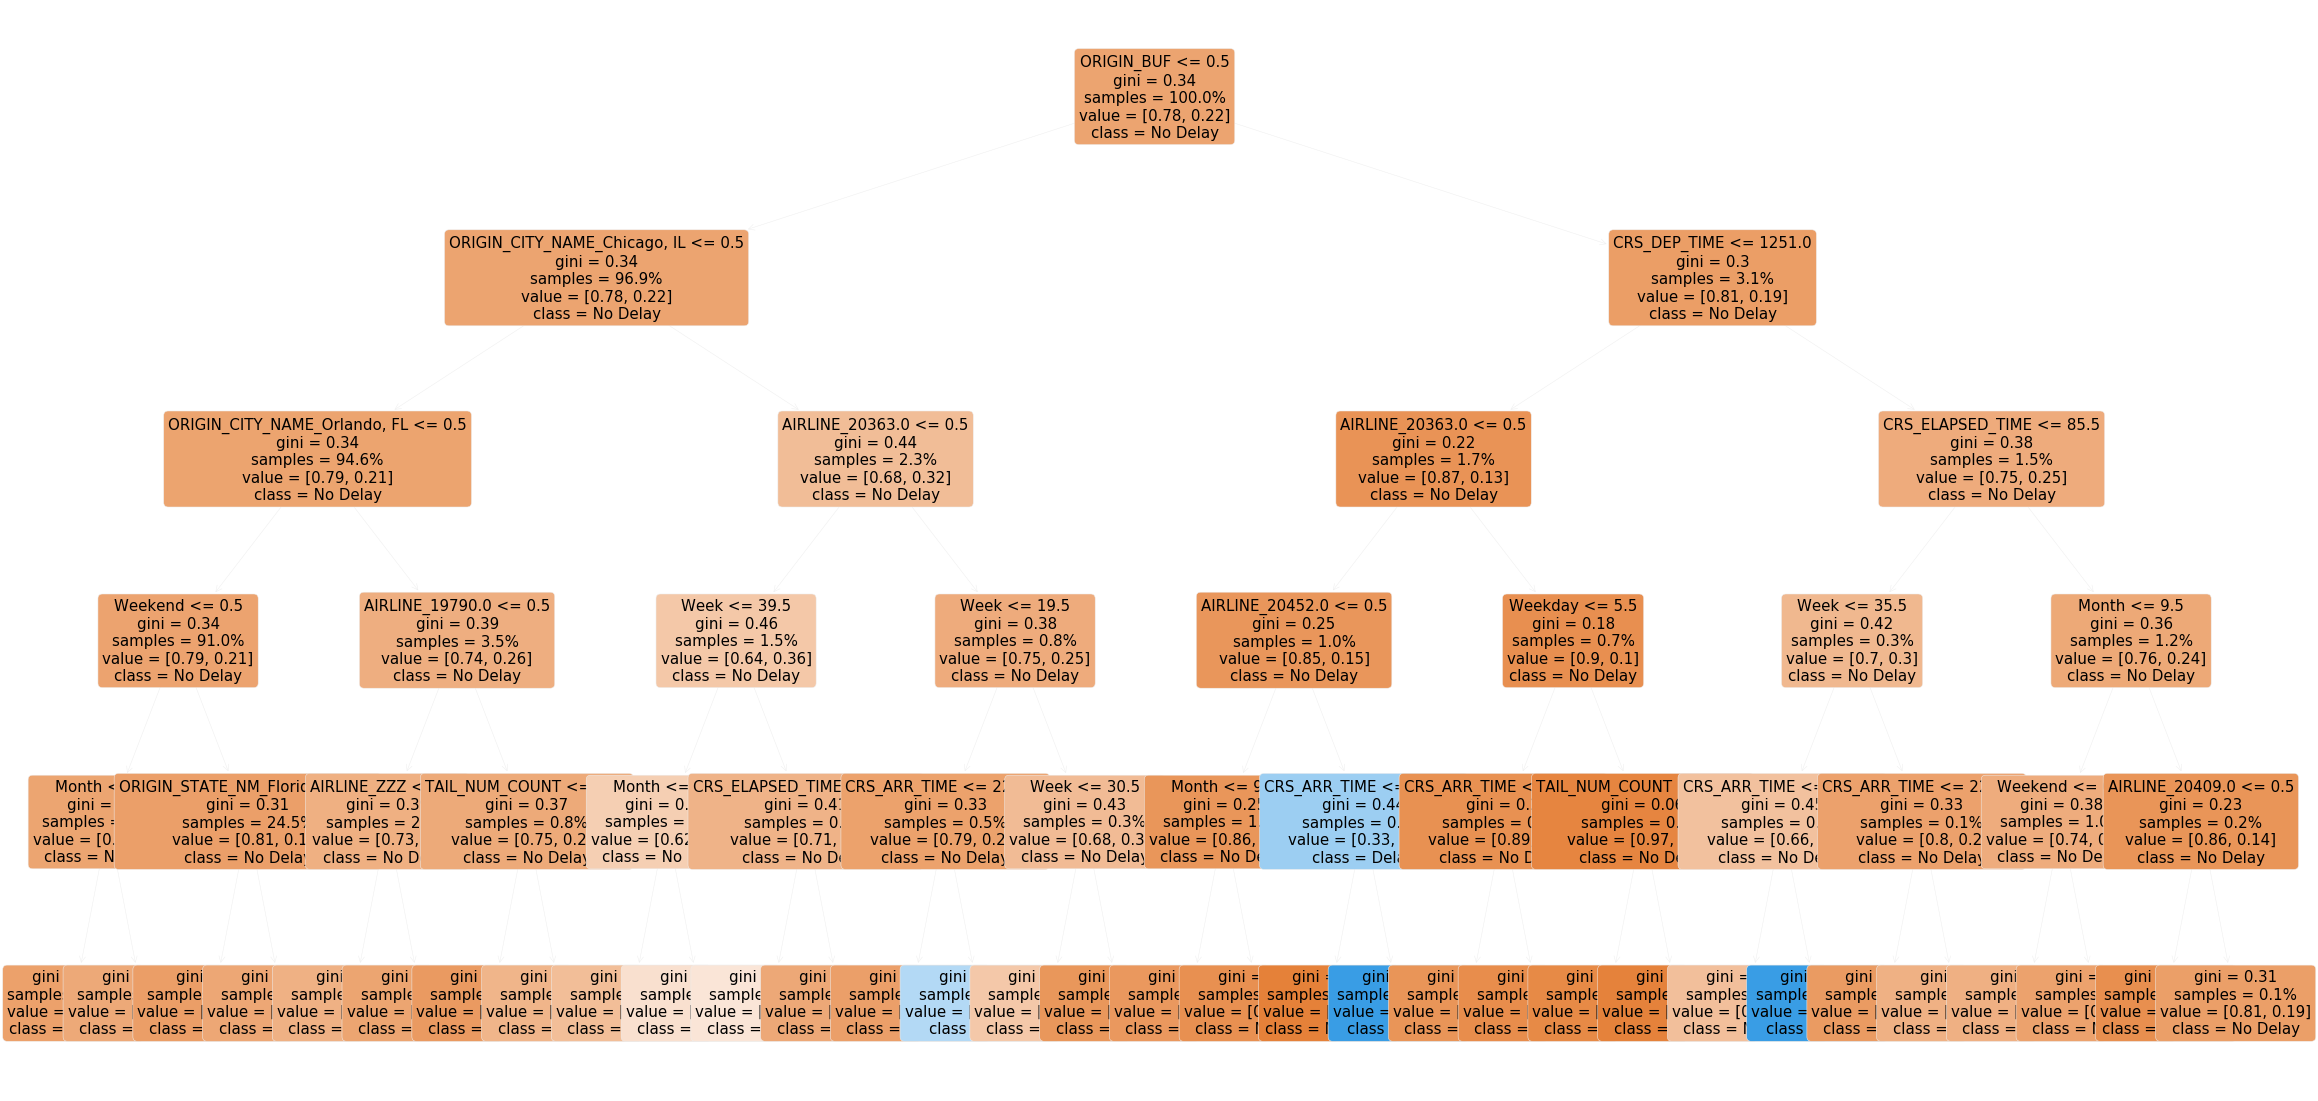

In [207]:
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(tree_list[2], 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               impurity=True,
                rounded = True,
               precision = 2,

               class_names = ['No Delay', 'Delay'],
               feature_names = X_test.columns);

But if we want to understand the importance of each future to the ensemble, we can use the **feature_importance** method, which averages the information gain of the predictor across the whole ensemble.  

In [208]:
top_features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [209]:
top_features

CRS_ARR_TIME                   0.25
TAXI_OUT                       0.23
CRS_DEP_TIME                   0.09
Month                          0.09
ORIGIN_CITY_NAME_Chicago, IL   0.07
Week                           0.06
Weekend                        0.04
CRS_ELAPSED_TIME               0.03
ORIGIN_CITY_NAME_Orlando, FL   0.02
AIRLINE_20363.0                0.02
AIRLINE_19790.0                0.02
AIRLINE_20409.0                0.02
ORIGIN_STATE_NM_Florida        0.02
TAIL_NUM_COUNT                 0.02
DISTANCE                       0.01
ORIGIN_BUF                     0.01
Weekday                        0.00
ORIGIN_MVY                     0.00
AIRLINE_20398.0                0.00
ORIGIN_STT                     0.00
dtype: float64

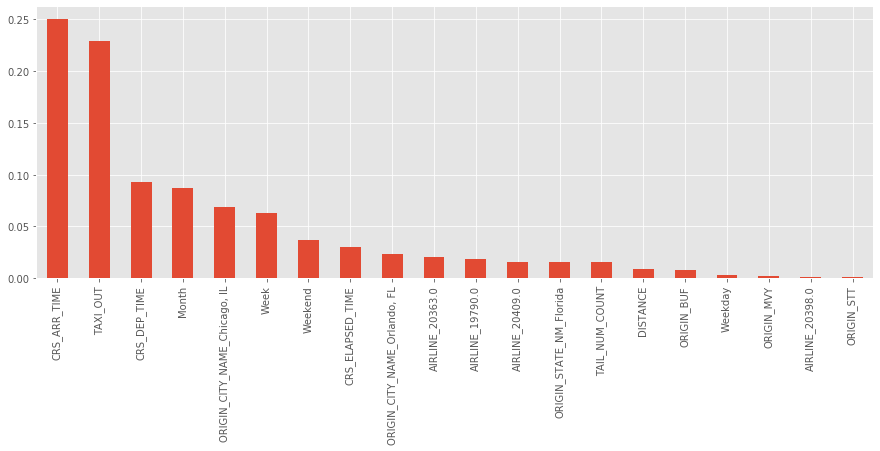

In [210]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

We are ready to try our first proper random forest model. Let's start with 100 trees, and let's evaluate AUC score and its ROC curve

In [211]:
rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=500, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [212]:
y_score = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [213]:
results_df = y_test.join(y_score)

In [214]:
results_df.head(10)

,ARR_DEL15,DelayScore
218278,0.00,0.21
218279,0.00,0.27
218280,0.00,0.20
218281,0.00,0.19
218282,0.00,0.16
218283,0.00,0.19
218284,1.00,0.38
218285,0.00,0.28
218286,0.00,0.20
218287,1.00,0.19


In [215]:
print(metrics.roc_auc_score(results_df['ARR_DEL15'], results_df['DelayScore']))

0.7179782493931373


In [216]:
fpr, tpr, _ = metrics.roc_curve(results_df['ARR_DEL15'], results_df['DelayScore'])

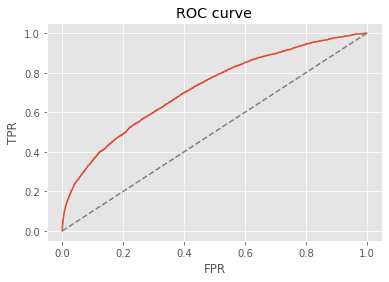

In [217]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### 4.3.2. ENSEMBLE MODELS 
#### b) Gradient Boosting Classifier 


In [218]:
GradientBoostingClassifier??

Let's start training a gradient boosting model with 50 trees, and let's run a similar quick evaluation based on AUC score and ROC curve

In [219]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_split=500, random_state=42)
gb.fit(X_train, np.ravel(y_train))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=500,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [220]:
y_score = pd.DataFrame(gb.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [221]:
results_df = y_test.join(y_score)

In [222]:
print(metrics.roc_auc_score(results_df['ARR_DEL15'], results_df['DelayScore']))

0.7421373085361702


In [223]:
fpr, tpr, _ = metrics.roc_curve(results_df['ARR_DEL15'], results_df['DelayScore'])

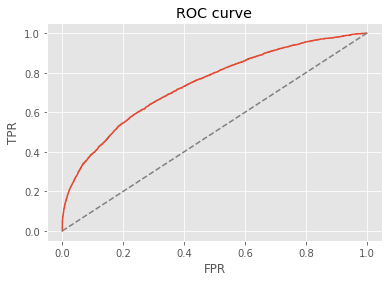

In [224]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### FINAL MODEL COMPARISON (Decison Tree vs Random Forest vs Gradient Boosting)

In [225]:
RANDOM_STATE = 42
n_estimators = 50
max_depth = 5

models = [ 
    ('DecisionTree', DecisionTreeClassifier(max_depth=max_depth, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE))
]

ROC AUC Score for DecisionTree: 0.6833864109422025
ROC AUC Score for RandomForest: 0.7089653504701128
ROC AUC Score for GradientBoosting: 0.7450710592363963


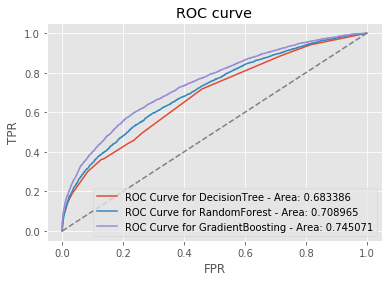

In [226]:
plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, np.ravel(y_train))
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()